# 1.  Анализ онлайн-рынка персональных компьютеров


К нам обратился клиент, который занимается сборкой и продажей персональных
компьютеров (за исключением мини-ПК и моноблоков). В связи с ростом
популярности интернет-магазинов, таких как Wildberries, Ozon, OnlineTrade и т.п.,
за последние несколько лет, а также с целью привлечения большего числа
клиентов при одновременном снижении затрат на содержание собственного
магазина, доставку и рекламу товаров на 10% он планирует выйти на онлайнрынок в ближайшие 3 месяца. В связи с этим клиент хотел бы узнать, от чего
зависит цена, а также популярность персональных компьютеров, выкладываемых
на онлайн-площадках, чтобы в дальнейшем планировать к сборке востребованные
по техническим характеристикам компьютеры и продавать их по конкурентной
цене.
Специалистом по сбору данных были выгружены датасеты с одного из
популярных онлайн-магазинов, содержащие информацию о товарах категории
«Компьютеры и моноблоки».
Проанализируйте полученные данные и представьте аналитический отчет,
содержащий выводы и рекомендации для Заказчика, которые помогут ему для
решения его бизнес-задач.

**Наша задача** - проанализировать данные и выдать аналитический отчет с выводами и рекомендациями для планирования сборки и продаж компьютеров на онлайн-рынке

Исходные данные:

• идентификатор товара (product_id)

• наименование товара (title)

• цена товара в руб. (price)

• количество продаж (sales)

• количество отзывов (feedbacks)

• наименование продавца (seller)

• рейтинг продавца (seller_rating)

• данные о процессоре (Процессор), в т. ч. о типе процессора (Процессор_тип),
о количестве ядер процессора (Количество ядер процессора)

• данные об оперативной памяти (Оперативная память), в т. ч. о типе
оперативной памяти (Тип оперативной памяти), об объеме оперативной
памяти (Объем оперативной памяти (Гб))

• данные об жестком диске (Жесткий диск), в т. ч. об объеме накопителя HDD
(Объем накопителя HDD), об объеме накопителя SSD (Объем накопителя
SSD)

• данные о видеопроцессоре (Видеопроцессор)

• данные об операционной системе (Операционная система)

• данные о гарантийном сроке (Гарантийный срок)

• страна производства (Страна производства)

• данные о габарите товара (Габариты товара), в т. ч. о ширине предмета
(Ширина предмета), о глубине предмета (Глубина предмета), о высоте
предмета (Высота предмета), о весе предмета (Вес без упаковки (кг))

• данные о габарите товара с упаковкой (Габариты товара (с упаковкой)), в т.
ч. длине упаковки (Длина упаковки), о ширине упаковки (Ширина упаковки),
о высоте упаковки (Высота упаковки), о весе предмета с упаковкой (Вес с
упаковкой (кг))

# 2 Изучение данных

## 2.1 Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
import json
import re
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from scipy.stats import chi2_contingency
from itertools import combinations

## 2.2 Загрузка файла

In [ ]:
uploaded = files.upload()


Saving wb_pc_hard.csv to wb_pc_hard (1).csv


## 2.3 Чтение файла

In [ ]:
data = pd.read_csv('wb_pc_hard.csv')

## 2.4 Обзор датасета

In [ ]:
# Просмотр первых 5 строк набора данных
data.head()

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой)
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805₽,Купили более 400 раз,7 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,отсутствует,3года,Россия,"{'Ширина предмета': '28.5 см', 'Глубина предме...","{'Длина упаковки': '43.5 см', 'Ширина упаковки..."
1,17877962,Системный блок,32900₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '43 см', 'Ширина упаковки':..."
2,17880420,Компьютер Hp Prodesk 400 g6 mt,35720₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,NaN,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': None, 'Ширина упаковки': No..."
3,19347937,Офисный Компьютер Robotcomp Казначей V1,39237₽,Купили более 10 раз,1 отзыв,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel UHD Graphics 630,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '28 см', 'Глубина предмета...","{'Длина упаковки': '60 см', 'Ширина упаковки':..."
4,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76188₽,Купили более 200 раз,94 отзыва,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':..."


In [ ]:
# Просмотр последних 5 строк набора данных
data.tail()

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой)
4495,152971271,Игровой ПК,70000₽,NaN,0 отзывов,Personal PC,0.0,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': '1000 гб', 'Объем нак...",Nvidia,Windows 10 pro,1 год,NaN,"{'Ширина предмета': '35 см', 'Глубина предмета...","{'Длина упаковки': '40 см', 'Ширина упаковки':..."
4496,152978335,Игровой ПК,70000₽,NaN,0 отзывов,Personal PC,0.0,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': '1000 Гб', 'Объем нак...",NVIDIA,Windows 10 Pro,1 год,NaN,"{'Ширина предмета': '35 см', 'Глубина предмета...","{'Длина упаковки': '40 см', 'Ширина упаковки':..."
4497,152979371,Игровой ПК,70000₽,NaN,0 отзывов,Personal PC,0.0,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': '1000 Гб', 'Объем нак...",NVIDIA,Windows 10 Pro,1 год,NaN,"{'Ширина предмета': '35 см', 'Глубина предмета...","{'Длина упаковки': '40 см', 'Ширина упаковки':..."
4498,152979918,Игровой ПК,70000₽,NaN,0 отзывов,Personal PC,0.0,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': '1000 гб', 'Объем нак...",Nvidia,Windows 10 pro,1 год,NaN,"{'Ширина предмета': '30 см', 'Глубина предмета...","{'Длина упаковки': '40 см', 'Ширина упаковки':..."
4499,152980834,Игровой ПК,70000₽,NaN,0 отзывов,Personal PC,0.0,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': '1000 гб', 'Объем нак...",Nvidia,Windows 10 pro,1 год,NaN,"{'Ширина предмета': '30 см', 'Глубина предмета...","{'Длина упаковки': '40 см', 'Ширина упаковки':..."


In [ ]:
# Просмотр случайных 5 строк из набора данных
data.sample(5)

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой)
312,57823441,Игровой Компьютер Robotcomp Pantera V1,79046₽,Купили менее 5 раз,0 отзывов,Robotcomp,4.7,"{'Процессор_тип': 'AMD Ryzen 5', 'Количество я...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce RTX 3050,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '22 см', 'Глубина предмета...","{'Длина упаковки': '52 см', 'Ширина упаковки':..."
3239,146460505,Мощный игровой компьютер Golden6.2 Ryzen 5 360...,87120₽,NaN,0 отзывов,ЖЕЛЕЗНЫЙ ДВОРИК,4.8,"{'Процессор_тип': 'AMD Ryzen 5', 'Количество я...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce RTX 3060,Windows 10 Pro,12 месяцев,Россия,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '50 см', 'Ширина упаковки':..."
3542,150536632,Игровой компьютер Fighter M1,71007₽,NaN,0 отзывов,M-Bit,0.0,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce RTX 2060,Windows 11 Pro,NaN,NaN,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '60 см', 'Ширина упаковки':..."
1390,119406191,Игровой компьютер Roo24 AMD Ryzen 5 4600G 16960,38795₽,Купили более 40 раз,15 отзывов,Roo24.ru,4.7,"{'Процессор_тип': 'AMD Ryzen 5', 'Количество я...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",AMD Radeon Vega 7,Windows 10 Pro,3 года,Россия,"{'Ширина предмета': '22 см', 'Глубина предмета...","{'Длина упаковки': '43 см', 'Ширина упаковки':..."
1874,140375480,Игровой компьютер ElitePC Golden1.3 i7-3770 AM...,36800₽,Купили более 5 раз,3 отзыва,ЖЕЛЕЗНЫЙ ДВОРИК,4.8,"{'Процессор_тип': 'Intel Core i7', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",AMD Radeon RX 470,Windows 10 Pro,12 месяцев,Россия,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '60 см', 'Ширина упаковки':..."


In [ ]:
# Просмотр размера набора данных
data.shape

(4500, 16)

In [ ]:
# Просмотр общей информации о наборе данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     4500 non-null   int64  
 1   title                          4500 non-null   object 
 2   price                          4499 non-null   object 
 3   sales                          1164 non-null   object 
 4   feedbacks                      4500 non-null   object 
 5   seller                         4391 non-null   object 
 6   seller_rating                  4389 non-null   float64
 7   Процессор                      4500 non-null   object 
 8   Оперативная память             4500 non-null   object 
 9   Жесткий диск                   4500 non-null   object 
 10  Видеопроцессор                 4500 non-null   object 
 11  Операционная система           4500 non-null   object 
 12  Гарантийный срок               2648 non-null   o

## 2.5 Выявление проблем

На основе вывода данных и информации о них можно выявить несколько проблем в датасете:

**Пропущенные значения:**

price: 1 пропущенное значение.

sales: много пропущенных значений (3336).

seller: 109 пропущенных значений.

seller_rating: 111 пропущенных значений.

Гарантийный срок: 1852 пропущенных значения.

Страна производства: 1889 пропущенных значения.

**Неправильный тип данных:**

price: тип данных object, хотя это должно быть числовое значение (float или int).

sales: тип данных object, хотя это должно быть числовое значение (float или int).

feedbacks: тип данных object, хотя это должно быть числовое значение (float или int).

Процессор, Оперативная память, Жесткий диск, Габариты товара, Габариты товара (с упаковкой): данные представлены в виде словарей в строковом формате, что требует распаковки и приведения к соответствующим типам.

**Структурные проблемы:**

Некоторые колонки содержат словари в строковом формате, такие как Процессор, Оперативная память, Жесткий диск, Габариты товара, Габариты товара (с упаковкой). Эти данные требуют дополнительной обработки для извлечения информации.
Эти проблемы необходимо решить на этапе предобработки данных перед их дальнейшим анализом.

**Непоследовательные значения строковых данных:**

В столбцах, таких как gpu, могут встречаться значения, написанные по-разному (например, Nvidia и NVIDIA), что требует унификации.

**Непоследовательные имена столбцов:**

Столбцы имеют названия на разных языках (русский и английский), а также различаются по регистру букв и форматированию (пробелы, заглавные буквы и т.д.).

**Избыточная информация в столбцах:**

Некоторые столбцы содержат лишнюю информацию, например, в sales и feedbacks есть текстовые данные, которые нужно удалить для приведения к числовому формату.

**Неявные значения и их замена:**

В некоторых столбцах есть значения, такие как не заполнено, которые могут быть заменены на NaN для дальнейшей обработки.

**План предобработки данных**

1. Удаление ненужных столбцов:

Удаление столбцов, не имеющих значения для анализа, таких как Габариты товара и Габариты товара (с упаковкой).
2. Проверка и удаление дубликатов:

Проверка наличия дубликатов по всем столбцам.
Удаление дубликатов для устранения избыточных данных.
3. Приведение имен столбцов к единому формату и переводу их на один язык:

Переименование столбцов на русский язык и приведение всех имен к нижнему регистру и удобному формату.
4. Приведение всех строковых значений к единому формату:

Преобразование всех строковых значений в DataFrame к нижнему регистру для устранения различий в написании.
5. Распаковка вложенных данных:

Распаковка данных в столбцах "процессор", "оперативная память", "жесткий диск" для получения структурированных данных в виде отдельных столбцов.
6. Удаление символов и приведение данных к числовому формату:

Преобразование столбцов цена, продажи, отзывы в числовые типы данных после удаления ненужных символов и текста.
7. Очистка и нормализация данных в столбцах:

Очистка и нормализация данных в столбцах видеопроцессор, операционная_система, гарантийный_срок, процессор_тип, количество ядер процессора, тип оперативной памяти, объем оперативной памяти (гб), объем накопителя hdd, объем накопителя ssd.
Применение методов замены, унификации и исправления опечаток.
8. Заполнение пропущенных значений:

Заполнение пропущенных значений в числовых столбцах медианой (например, цена, рейтинг_продавца).
Заполнение пропущенных значений в категориальных столбцах модой (например, продавец, страна_производства, видеопроцессор, процессор_тип).
9. Переименование всех столбцов для использования нижнего регистра и подчеркиваний:

Переименование всех столбцов, чтобы они соответствовали единому стилю и формату.
10. Контрольная проверка и анализ готовности данных:


Проверка уникальных значений во всех столбцах для подтверждения корректности нормализации.
Финальная проверка типов данных и заполненности всех столбцов.

# 3 Предобработка данных

## 3.1 Проверка и исключение дубликатов

In [ ]:
# Удаляем не нужные столбцы для дальнейшего анализа

data = data.drop(columns=["Габариты товара", "Габариты товара (с упаковкой)"])

In [ ]:
# Создание копии датафрейма
data_copy = data.copy()

In [ ]:
# Проверка на дубликаты
duplicates = data_copy.duplicated()
print(f"\nКоличество дублирующихся строк: {duplicates.sum()}")


Количество дублирующихся строк: 490


In [ ]:
# Проверка на дубликаты по столбцу product_id
product_id = data_copy.duplicated(subset=['product_id'])
print(f"Количество дублирующихся строк по столбцу product_id: {product_id.sum()}")


Количество дублирующихся строк по столбцу product_id: 490


In [ ]:
# Удаление дубликатов на основе всех столбцов
data_copy.drop_duplicates(inplace=True)

In [ ]:
# Сброс индексов
data_copy.reset_index(drop=True, inplace=True)


In [ ]:
# Вывод размера DataFrame data_copy
data_copy.shape


(4010, 14)

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            4500 non-null   int64  
 1   title                 4500 non-null   object 
 2   price                 4499 non-null   object 
 3   sales                 1164 non-null   object 
 4   feedbacks             4500 non-null   object 
 5   seller                4391 non-null   object 
 6   seller_rating         4389 non-null   float64
 7   Процессор             4500 non-null   object 
 8   Оперативная память    4500 non-null   object 
 9   Жесткий диск          4500 non-null   object 
 10  Видеопроцессор        4500 non-null   object 
 11  Операционная система  4500 non-null   object 
 12  Гарантийный срок      2648 non-null   object 
 13  Страна производства   2611 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 492.3+ KB
None


## 3.2 Приведение имен столбцов к единому формату и переводу их на один язык

In [ ]:
# Переименование столбцов
data_copy.rename(columns={
    'product_id': 'ид_продукта',
    'title': 'название',
    'price': 'цена',
    'sales': 'продажи',
    'feedbacks': 'отзывы',
    'seller': 'продавец',
    'seller_rating': 'рейтинг_продавца',
    'Процессор': 'процессор',
    'Оперативная память': 'оперативная_память',
    'Жесткий диск': 'жесткий_диск',
    'Видеопроцессор': 'видеопроцессор',
    'Операционная система': 'операционная_система',
    'Гарантийный срок': 'гарантийный_срок',
    'Страна производства': 'страна_производства'
}, inplace=True)

In [ ]:
# Вывод обновленного списка имен столбцов
print(data_copy.columns)

Index(['ид_продукта', 'название', 'цена', 'продажи', 'отзывы', 'продавец',
       'рейтинг_продавца', 'процессор', 'оперативная_память', 'жесткий_диск',
       'видеопроцессор', 'операционная_система', 'гарантийный_срок',
       'страна_производства'],
      dtype='object')


##3.2 Приведение всех строковых значений к единому формату (например, нижний регистр) для устранения различий в написании



In [ ]:
# Приведение всех строковых значений к нижнему регистру в DataFrame
data_copy = data_copy.applymap(lambda x: x.lower() if isinstance(x, str) else x)


<ipython-input-19-366464b8ee2f>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_copy = data_copy.applymap(lambda x: x.lower() if isinstance(x, str) else x)


##3.3 Распаковка данных в столбцах "процессор", "оперативная память", "жесткий диск", "габариты товара", "габариты товара (с упаковкой) для получения структурированных данных".

In [ ]:
# Функция для преобразования строки в словарь
def str_to_dict(s):
    try:
        return json.loads(s.replace("'", '"'))
    except json.JSONDecodeError:
        return {}

# Преобразование столбцов
data_copy['процессор'] = data_copy['процессор'].apply(str_to_dict)
data_copy['оперативная_память'] = data_copy['оперативная_память'].apply(str_to_dict)
data_copy['жесткий_диск'] = data_copy['жесткий_диск'].apply(str_to_dict)

In [ ]:
# Распаковка столбца 'процессор'
processor_df = data_copy['процессор'].apply(pd.Series)
data_copy = pd.concat([data_copy.drop(columns=['процессор']), processor_df], axis=1)

# Распаковка столбца 'оперативная_память'
ram_df = data_copy['оперативная_память'].apply(pd.Series)
data_copy = pd.concat([data_copy.drop(columns=['оперативная_память']), ram_df], axis=1)

# Распаковка столбца 'жесткий_диск'
hard_drive_df = data_copy['жесткий_диск'].apply(pd.Series)
data_copy = pd.concat([data_copy.drop(columns=['жесткий_диск']), hard_drive_df], axis=1)

In [ ]:
# Проверка распаковки
data_copy.head()

,ид_продукта,название,цена,продажи,отзывы,продавец,рейтинг_продавца,видеопроцессор,операционная_система,гарантийный_срок,страна_производства,процессор_тип,количество ядер процессора,тип оперативной памяти,объем оперативной памяти (гб),объем накопителя hdd,объем накопителя ssd
0,10148385,системный блок office 120 wb 0710623 j1800/4gb...,10805₽,купили более 400 раз,7 отзывов,NaN,NaN,intel hd graphics,отсутствует,3года,россия,intel celeron,2,ddr 3,4 гб,NaN,NaN
1,17877962,системный блок,32900₽,NaN,0 отзывов,NaN,NaN,не заполнено,отсутствует,NaN,китай,intel core i5,не заполнено,не заполнено,16 гб,NaN,NaN
2,17880420,компьютер hp prodesk 400 g6 mt,35720₽,NaN,0 отзывов,NaN,NaN,не заполнено,отсутствует,NaN,NaN,не заполнено,не заполнено,не заполнено,16 гб,NaN,NaN
3,19347937,офисный компьютер robotcomp казначей v1,39237₽,купили более 10 раз,1 отзыв,robotcomp,4.7,intel uhd graphics 630,windows пробная,3 года (36 месяцев),россия,intel core i5,6,ddr 4,8,NaN,NaN
4,19348951,игровой компьютер robotcomp м16 2.0 v1,76188₽,купили более 200 раз,94 отзыва,robotcomp,4.7,nvidia geforce gtx 1660,windows пробная,3 года (36 месяцев),россия,intel core i5,6,ddr 4,16,NaN,NaN


##3.4 Просмотр уникальных значений

In [ ]:
# Выводим уникальные значения
for column in ['ид_продукта', 'название', 'цена', 'продажи', 'отзывы', 'продавец',
               'рейтинг_продавца','видеопроцессор', 'операционная_система',
               'гарантийный_срок', 'страна_производства', 'процессор_тип', 'количество ядер процессора', 'тип оперативной памяти',
               'объем оперативной памяти (гб)', 'объем накопителя hdd', 'объем накопителя ssd',
               ]:

    unique_values = data_copy[column].unique()
    unique_count = data_copy[column].nunique()

    print(f"Столбец: {column}")
    print(f"Количество уникальных значений: {unique_count}")
    print(f"Уникальные значения: {unique_values}")
    print("\n" + "-"*50 + "\n")

Столбец: ид_продукта
Количество уникальных значений: 4010
Уникальные значения: [ 10148385  17877962  17880420 ... 152979371 152979918 152980834]

--------------------------------------------------

Столбец: название
Количество уникальных значений: 2007
Уникальные значения: ['системный блок office 120 wb 0710623 j1800/4gb/2tb+ssd120gb/300w/dos'
 'системный блок' 'компьютер hp prodesk 400 g6 mt' ...
 'компьютер /8gb/ssd-128/hdd-500/монитор 20"' ' игровой компьютер '
 'игровой пк ']

--------------------------------------------------

Столбец: цена
Количество уникальных значений: 2081
Уникальные значения: ['10805₽' '32900₽' '35720₽' ... '21988₽' '4219₽' '77250₽']

--------------------------------------------------

Столбец: продажи
Количество уникальных значений: 18
Уникальные значения: ['купили более 400 раз' nan 'купили более 10 раз' 'купили более 200 раз'
 'купили более 40 раз' 'купили более 5 раз' 'купили более 30 раз'
 'купили более 20 раз' 'купили более 50 раз' 'купили менее 5 раз'


##3.5 Удаление символов и приведение в нужный числовой формат в столбце "цена"

In [ ]:
# Убираем символы валюты и преобразуем в тип float
data_copy['цена'] = data_copy['цена'].str.replace('₽', '').str.replace(',', '').astype(float)

In [ ]:
# Проверим результат
print(data_copy['цена'].head())

0    10805.0
1    32900.0
2    35720.0
3    39237.0
4    76188.0
Name: цена, dtype: float64


## 3.6 Удаление символов и приведение в нужный числовой формат в столбце "продажи"

In [ ]:
def process_sales_value(value):
    if pd.isna(value):
        return 0
    # Удаление лишнего текста и пробелов
    value = re.sub(r'[^\d]', '', value)
    return int(value)

data_copy['продажи'] = data_copy['продажи'].apply(process_sales_value)

In [ ]:
# Преобразование в числовой формат
data_copy['продажи'] = pd.to_numeric(data_copy['продажи'])

In [ ]:
print(data_copy['продажи'].head())

0    400
1      0
2      0
3     10
4    200
Name: продажи, dtype: int64


## 3.6 Удаление символов и приведение в нужный числовой формат в столбце "отзывы"

In [ ]:
# Удаление всех буквенных символов и приведение к числовому типу
data_copy['отзывы'] = data_copy['отзывы'].str.extract('(\d+)').astype(int)

In [ ]:
# Проверим результат
print(data_copy['отзывы'].head())

0     7
1     0
2     0
3     1
4    94
Name: отзывы, dtype: int64


## 3.7 Очистка и нормализация данных в столбце "видеопроцессор"

In [ ]:
def clean_gpu(gpu):
    if isinstance(gpu, str):
        gpu = gpu.lower()
        # Унификация вариаций
        gpu = re.sub(r'nvidia.*rtx 1650.*', 'nvidia geforce rtx 1650', gpu)
        gpu = re.sub(r'rx.*570.*', 'amd radeon rx 570', gpu)
        gpu = re.sub(r'rx.*580.*', 'amd radeon rx 580', gpu)
        gpu = re.sub(r'invidia', 'nvidia', gpu)
        gpu = re.sub(r'vega.*', 'amd radeon vega', gpu)
        # Исправление опечаток и нормализация
        gpu = gpu.replace('uhd-графика', 'intel uhd graphics')
        gpu = gpu.replace('не заполнено', 'unknown')
        gpu = re.sub(r'.*без видеокарты.*', 'без видеокарты', gpu)
        # Удаление лишней информации о процессорах
        if 'core i' in gpu or 'графический процессор' in gpu:
            gpu = 'unknown'
    return gpu

data_copy['видеопроцессор'] = data_copy['видеопроцессор'].apply(clean_gpu)

In [ ]:
# Проверка уникальных значений
data_copy['видеопроцессор'].unique()

array(['intel hd graphics', 'unknown', 'intel uhd graphics 630',
       'nvidia geforce gtx 1660', 'nvidia geforce gtx 1650',
       'nvidia geforce rtx 3070', 'nvidia geforce rtx 3050',
       'amd radeon amd radeon vega', 'nvidia geforce rtx 3080',
       'nvidia geforce rtx 3060', 'nvidia geforce gt 1030',
       'intel uhd graphics 750', 'intel hd graphics 6000',
       'intel uhd graphics 600', 'intel hd graphics 600',
       'intel hd graphics 610', 'nvidia geforce gt 730',
       'intel hd graphics 630', 'amd radeon amd radeon rx 580',
       'nvidia geforce gtx 1050', 'nvidia quadro t400',
       'nvidia geforce gt 740', 'intel hd graphics 530',
       'nvidia geforce rtx 2060', 'intel uhd graphics 610',
       'amd radeon r5', 'nvidia', 'intel hd graphics 500',
       'nvidia geforce gtx 1630', 'nvidia geforce gt 610',
       'amd radeon rx 550', 'amd radeon rx 6500',
       'intel hd graphics 2000', 'intel hd graphics 4000', 'amd',
       'intel uhd graphics', 'без видеокарты

## 3.8 Очистка и нормализация данных в столбце "операционная_система"

In [ ]:
def clean_os(os):
    if isinstance(os, str):
        os = os.lower()
        # Унификация названий Windows
        os = re.sub(r'windows.*10.*pro.*', 'windows 10 pro', os)
        os = re.sub(r'windows.*10.*home.*', 'windows 10 home', os)
        os = re.sub(r'windows.*10.*', 'windows 10', os)
        os = re.sub(r'windows.*11.*pro.*', 'windows 11 pro', os)
        os = re.sub(r'windows.*11.*home.*', 'windows 11 home', os)
        os = re.sub(r'windows.*11.*', 'windows 11', os)
        # Унификация пробных версий
        os = re.sub(r'.*trial.*|.*пробная.*|.*(trial version).*', 'trial', os)
        # Обработка отсутствия ОС
        os = re.sub(r'отсутствует|без oc|без ос', 'нет ос', os)
        # Обработка опечаток
        os = os.replace('widows 11 pro', 'windows 11 pro')
    return os

data_copy['операционная_система'] = data_copy['операционная_система'].apply(clean_os)

In [ ]:
# Объединения значений
def further_clean_os(os):
    if os in ['win 10pro', 'windows 10']:
        return 'windows 10'
    elif os in ['microsoft windows 11', 'windows 11']:
        return 'windows 11'
    elif os in ['dos', 'free dos']:
        return 'dos'
    else:
        return os

data_copy['операционная_система'] = data_copy['операционная_система'].apply(further_clean_os)

In [ ]:
# Проверка уникальных значений
data_copy['операционная_система'].unique()

array(['нет ос', 'trial', 'windows 10', 'windows', 'dos', 'windows 11',
       'windows 11 pro', 'linux', 'macos'], dtype=object)

## 3.9 Нормализация строковых значений в столбце "гарантийный срок", перевод в нужный тип данных

In [ ]:
# Функция для конвертации гарантийного срока
def convert_warranty_period(value):
    if pd.isna(value):
        return None
    value = value.lower().strip()

    # Обработка различных вариантов
    if '3года' in value or '3 года' in value or '36 мес' in value or '36 месяцев' in value:
        return 36
    elif '2 года' in value or '24 мес' in value or '24 месяца' in value:
        return 24
    elif '1 год' in value or '12 мес' in value or '12 месяцев' in value:
        return 12
    elif '6 мес' in value or '6 месяцев' in value:
        return 6
    elif '3 мес' in value or '3 месяца' in value:
        return 3
    elif '2 месяца' in value:
        return 2
    elif '1 месяц' in value or value == '1':
        return 1
    elif '7 дней' in value:
        return 0.23  # Перевод 7 дней в месяцы (~0.23 месяца)
    elif '14 дней' in value:
        return 0.46  # Перевод 14 дней в месяцы (~0.46 месяца)
    elif '30 дней' in value:
        return 1  # 30 дней можно считать за 1 месяц
    elif '365 дней' in value:
        return 12  # 365 дней можно считать за 12 месяцев
    else:
        return None  # Если значение не распознано, возвращаем None

# Применение функции к столбцу
data_copy['гарантийный_срок_в_месяцах'] = data_copy['гарантийный_срок'].apply(convert_warranty_period)

# Замена старого столбца новым
data_copy['гарантийный_срок'] = data_copy['гарантийный_срок_в_месяцах']

# Удаление временного столбца
data_copy.drop(columns=['гарантийный_срок_в_месяцах'], inplace=True)

In [ ]:
# Проверка уникальных значений
data_copy['гарантийный_срок'].unique()

array([36.  ,   nan,  6.  , 12.  , 24.  ,  0.23,  3.  ,  1.  ,  0.46,
        2.  ])

## 3.10 Нормализация строковых значений в столбце "процессор_тип"

In [ ]:
# Удалим пробелы в начале и в конце строк
data_copy['процессор_тип'] = data_copy['процессор_тип'].str.strip()

In [ ]:
# Создадим словарь для замены опечаток и объединения похожих значений
replacement_dict = {
    'intel celeron': 'intel celeron',
    'intel core i5': 'intel core i5',
    'не заполнено': None,
    'intel core i3': 'intel core i3',
    'amd ryzen 5': 'amd ryzen 5',
    'amd athlon': 'amd athlon',
    'intel core i7': 'intel core i7',
    'intel core i9': 'intel core i9',
    'amd ryzen 3': 'amd ryzen 3',
    'gemini lake refresh j4115': 'gemini lake refresh j4115',
    'gemini lake refresh j4125': 'gemini lake refresh j4125',
    'intel core 12400f': 'intel core i5 12400f',
    'gemini lake refresh processor j4125': 'gemini lake refresh j4125',
    'intel pentium': 'intel pentium',
    'intel j4125': 'intel core j4125',
    'intel': 'intel',
    'intel xeon': 'intel xeon',
    '6010': 'intel',
    'amd ryzen 7': 'amd ryzen 7',
    '12400f': 'intel core i5 12400f',
    'amd a6': 'amd a6',
    '8 ядер': 'amd ryzen 7',  # Если это относится к процессору Ryzen 7
    'intel j3455': 'intel j3455',
    'n3350': 'intel n3350',
    '4 ядра intel': 'intel core i5',  # Пример объединения с Core i5
    'intel 4 ядра': 'intel core i5',
    'intel atom x5-z8500': 'intel atom x5-z8500',
    'amd a12-9800e': 'amd a12-9800e',
    'intel atom n280 (1.6 ггц)': 'intel atom n280',
    'intel apollo lake j3355 dual-core (2 ггц)': 'intel apollo lake j3355',
    'amd e1-6010': 'amd e1-6010',
    'intel n5095': 'intel n5095',
    'amd ryzen 4600g vega7 арт. 100343717': 'amd ryzen 4600g vega7',
    'intel processor n5095': 'intel n5095',
    'встроенный intel j3160 - core 1.5 ггц': 'intel j3160',
    'intel z8350 4 ядра 1,92 ггц 64 бита': 'intel z8350',
    'intel n5105': 'intel n5105',
    'amd ryzen 6': 'amd ryzen 5',  # Если это ошибка и на самом деле Ryzen 5
    'amd ryzen 4600g vega7 арт. 143553804': 'amd ryzen 4600g vega7',
    'intel atom dualcore d2550 cedar trail': 'intel atom d2550',
    'amd ryzen 9': 'amd ryzen 9',
    'a10-5800kram': 'amd a10-5800k',
    'amd fx-4300': 'amd fx-4300',
    'amd fx-6100': 'amd fx-6100',
    'intеl quad q9400': 'intel q9400',
    'intеl quad 9400': 'intel q9400',
    'intel e5': 'intel e5',
    'intel core quad 9400': 'intel q9400',
    'intel e3': 'intel e3',
    'amd radeon rx 570': 'amd radeon rx 570',
    'q9400': 'intel q9400',
    'intеl quad': 'intel q9400',
    'ryzen; 3 1300x': 'amd ryzen 3 1300x',
    'intel core i 3 10100f': 'intel core i3 10100f',
    'intel core i 5 10400f': 'intel core i5 10400f',
    'intel j1800 2,0 ghz quad core': 'intel j1800',
    'cortex-a53': 'cortex-a53',
    'apple m1': 'apple m1',
    'amd рязань 5 5600x': 'amd ryzen 5 5600x',
    'amd рязань 5 4650': 'amd ryzen 5 4650',
    'arm cortex-a53': 'arm cortex-a53'
}

data_copy['процессор_тип'] = data_copy['процессор_тип'].replace(replacement_dict)

In [ ]:
# Проверка уникальных значений
print(data_copy['процессор_тип'].unique())

['intel celeron' 'intel core i5' None 'intel core i3' 'amd ryzen 5'
 'amd athlon' 'intel core i7' 'intel core i9' 'amd ryzen 3'
 'gemini lake refresh j4115' 'gemini lake refresh j4125'
 'intel core i5 12400f' 'intel pentium' 'intel core j4125' 'intel'
 'intel xeon' 'amd ryzen 7' 'amd a6' 'intel j3455' 'intel n3350'
 'intel atom x5-z8500' 'amd a12-9800e' 'intel atom n280'
 'intel apollo lake j3355' 'amd e1-6010' 'intel n5095'
 'amd ryzen 4600g vega7' 'intel j3160' 'intel z8350' 'intel n5105'
 'intel atom d2550' 'amd ryzen 9' 'amd a10-5800k' 'amd fx-4300'
 'amd fx-6100' 'intel q9400' 'intel e5' 'intel e3' 'amd radeon rx 570'
 'amd ryzen 3 1300x' 'intel core i3 10100f' 'intel core i5 10400f'
 'intel j1800' 'cortex-a53' 'apple m1' 'amd ryzen 5 5600x'
 'amd ryzen 5 4650' 'arm cortex-a53']


## 3.12 Нормализация строковых значений в столбце "количество ядер процессора", перевод в нужный тип данных и заполнение модой

In [ ]:
# Удалим пробелы в начале и в конце строк
data_copy['количество ядер процессора'] = data_copy['количество ядер процессора'].str.strip()

In [ ]:
# Создадим словарь для замены и унификации значений
# Применяем замены по словарю
replacement_dict = {
    '2': '2',
    'не заполнено': None,
    '4': '4',
    '4 ядра': '4',
    '6': '6',
    '6 ядер': '6',
    '8': '8',
    '8 ядер': '8',
    '8 ядер 16 потоков': '8',
    '10': '10',
    '12': '12',
    '14': '14',
    '16': '16',
    '20': '20',
    '24 ядра': '24',
    '2 ядра': '2',
    '2 шт': '2'
}

data_copy['количество ядер процессора'] = data_copy['количество ядер процессора'].replace(replacement_dict)

In [ ]:
# Определим моду
mode_value_cores = data_copy['количество ядер процессора'].mode()[0]

# Заполним пропущенные значения модой и преобразуем тип данных в int
data_copy['количество ядер процессора'] = pd.to_numeric(data_copy['количество ядер процессора'], errors='coerce').fillna(mode_value_cores).astype(int)

In [ ]:
# Проверка уникальных значений
data_copy['количество ядер процессора'].unique()

array([ 2,  6, 10,  4, 12, 16,  8,  1, 14, 20, 24])

## 3.13 Нормализация строковых значений в столбце "тип оперативной памяти"

In [ ]:
# Удаление лишних пробелов
data_copy['тип оперативной памяти'] = data_copy['тип оперативной памяти'].str.strip()

In [ ]:
# Замена значений
replacement_dict = {
    'ddr 3': 'ddr3',
    'ddr 4': 'ddr4',
    'ddr 5': 'ddr5',
    'ddr': 'ddr',
    'soddim': 'so-dimm',
    '4gb': '4 гб',
    '16': '16 гб',
    '16 гб': '16 гб',
    'ram 16 гб': '16 гб',
    'не заполнено': None
}

data_copy['тип оперативной памяти'] = data_copy['тип оперативной памяти'].replace(replacement_dict)


In [ ]:
# Проверка уникальных значений
print(data_copy['тип оперативной памяти'].unique())

['ddr3' None 'ddr4' nan 'ddr' 'ddr5' 'so-dimm' '4 гб' '16 гб']


## 3.14 Нормализация строковых значений в столбце "объем оперативной памяти (гб)", перевод в нужный тип данных

In [ ]:
# Удаление лишних пробелов
data_copy['объем оперативной памяти (гб)'] = data_copy['объем оперативной памяти (гб)'].str.strip()

In [ ]:
# Замена значений
replacement_dict = {
    '4 гб': '4',
    '16 гб': '16',
    '6 гб': '6',
    '8 гб': '8',
    '32 гб': '32',
    '16гб': '16',
    '8 gb': '8',
    '8гб': '8',
    '2 гб': '2',
    '240 гб': '240',
    '8gb': '8',
    '64 гб': '64',
    '16 gb': '16',
    '4 gb': '4',
    '1000 гб': '1000'
}

data_copy['объем оперативной памяти (гб)'] = data_copy['объем оперативной памяти (гб)'].replace(replacement_dict)

In [ ]:
# Определим моду
mode_value_memory = data_copy['объем оперативной памяти (гб)'].mode()[0]

# Заполним пропущенные значения модой и преобразуем тип данных в int
data_copy['объем оперативной памяти (гб)'] = pd.to_numeric(data_copy['объем оперативной памяти (гб)'], errors='coerce').fillna(mode_value_memory).astype(int)

In [ ]:
# Проверка уникальных значений
data_copy['объем оперативной памяти (гб)'].unique()

array([   4,   16,    8,   32,    6,   64,    2,  240, 1000,    1])

## 3.15 Нормализация строковых значений в столбце "объем накопителя hdd"

In [ ]:
# Удаление лишних пробелов
data_copy['объем накопителя hdd'] = data_copy['объем накопителя hdd'].str.strip()

In [ ]:
# Замена значений
replacement_dict = {
    'нет': '0',
    'нет; без hdd': '0',
    'без hdd': '0',
    'отсутствует': '0',
    '1000 гб': '1000',
    '2000 гб': '2000',
    '1 тб': '1000',
    '2000gb': '2000',
    '1tb': '1000',
    '2tb': '2000',
    '1 tb': '1000',
    '500 гб': '500',
    '500 gb': '500',
    '1000 gb': '1000',
    '3000 гб': '3000',
    '2 тб': '2000',
    '512 гб': '512',
    '250 гб': '250',
    '256 гб': '256',
    '4000 гб; 4000': '4000',
    '1000gb': '1000',
    '500; 500 гб': '500',
    '1024 гб': '1024',
    '500': '500',
    '1000': '1000',
    '2000': '2000',
    '3000': '3000',
    '4000': '4000',
    '256': '256',
    '512': '512',
    '1024': '1024'
}

data_copy['объем накопителя hdd'] = data_copy['объем накопителя hdd'].replace(replacement_dict)

In [ ]:
# Определим моду
mode_value_hdd = data_copy['объем накопителя hdd'].mode()[0]

# Заполним пропущенные значения модой и преобразуем тип данных в int
data_copy['объем накопителя hdd'] = pd.to_numeric(data_copy['объем накопителя hdd'], errors='coerce').fillna(mode_value_hdd).astype(int)


In [ ]:
# Проверка уникальных значений
data_copy['объем накопителя hdd'].unique()

array([1000, 2000,    0,  500, 3000,  512,  250,  256, 4000, 1024])

## 3.16 Нормализация строковых значений в столбце "объем накопителя ssd"

In [ ]:
# Удаление лишних пробелов
data_copy['объем накопителя ssd'] = data_copy['объем накопителя ssd'].str.strip()

In [ ]:
# Замена значений
replacement_dict = {
    '512 гб': '512',
    '1000gb pci-e': '1000',
    '240gb': '240',
    '480gb': '480',
    '256gb': '256',
    '120gb': '120',
    '256 гб': '256',
    '512gb': '512',
    '500gb': '500',
    '480 гб': '480',
    '128 гб': '128',
    '128': '128',
    '240 гб': '240',
    '120 гб': '120',
    '16 гб': '16',
    '480 gb': '480',
    '120 gb': '120',
    '240 gb': '240',
    '120': '120',
    '2 тб': '2000',
    '1000 гб': '1000',
    '960 гб': '960',
    '500 гб': '500',
    '512 gb': '512',
    '250 гб': '250',
    '1 тб': '1000',
    '256': '256',
    '512': '512',
    '2000': '2000',
    '250': '250',
    '128; 128 гб': '128',
    '500': '500'
}

data_copy['объем накопителя ssd'] = data_copy['объем накопителя ssd'].replace(replacement_dict)

In [ ]:
# Определим моду
mode_value_ssd = data_copy['объем накопителя ssd'].mode()[0]

# Заполним пропущенные значения модой и преобразуем тип данных в int
data_copy['объем накопителя ssd'] = pd.to_numeric(data_copy['объем накопителя ssd'], errors='coerce').fillna(mode_value_ssd).astype(int)


In [ ]:
# Проверка уникальных значений
print(data_copy['объем накопителя ssd'].unique())

[ 480  512 1000  240  256  120  500  128   16 2000  960  250]


## 3.18 Обработка остальных пропущенных значений (заполнение или удаление в зависимости от необходимости).

In [ ]:
# Заполнение пропусков
# Для числовых значений используем медиану
data_copy['цена'] = data_copy['цена'].fillna(data_copy['цена'].median())
data_copy['рейтинг_продавца'] = data_copy['рейтинг_продавца'].fillna(data_copy['рейтинг_продавца'].median())

# Для категориальных значений используем моду (наиболее частое значение)
data_copy['продавец'] = data_copy['продавец'].fillna(data_copy['продавец'].mode()[0])
data_copy['страна_производства'] = data_copy['страна_производства'].fillna(data_copy['страна_производства'].mode()[0])

# Находим моду в столбце "видеопроцессор"
mode_gpu = data_copy['видеопроцессор'].mode()[0]
# Заполняем пропуски модой
data_copy['видеопроцессор'].fillna(mode_gpu, inplace=True)

# Заполняем пропуски значением "Без операционной системы"
data_copy['операционная_система'].fillna('без операционной системы', inplace=True)

# Находим моду в столбце "процессор_тип"
mode_value = data_copy['гарантийный_срок'].mode()[0]
# Заполняем пропуски модой
data_copy['гарантийный_срок'].fillna(mode_value, inplace=True)

# Находим моду в столбце "процессор_тип"
mode_processor = data_copy['процессор_тип'].mode()[0]
# Заполняем пропуски модой
data_copy['процессор_тип'].fillna(mode_processor, inplace=True)

# Находим моду в столбце "тип оперативной памяти"
mode_ram_type = data_copy['тип оперативной памяти'].mode()[0]
# Заполняем пропуски модой
data_copy['тип оперативной памяти'].fillna(mode_ram_type, inplace=True)

## 3.19 Применение ниженго регистра для столбцов

In [ ]:
# Переименование всех столбцов для использования нижнего регистра и подчеркиваний
data_copy.columns = data_copy.columns.str.strip().str.lower().str.replace(' ', '_')


In [ ]:
print(data_copy)

      ид_продукта                                           название     цена  \
0        10148385  системный блок office 120 wb 0710623 j1800/4gb...  10805.0   
1        17877962                                     системный блок  32900.0   
2        17880420                     компьютер hp prodesk 400 g6 mt  35720.0   
3        19347937            офисный компьютер robotcomp казначей v1  39237.0   
4        19348951             игровой компьютер robotcomp м16 2.0 v1  76188.0   
...           ...                                                ...      ...   
4005    152971271                                        игровой пк   70000.0   
4006    152978335                                        игровой пк   70000.0   
4007    152979371                                        игровой пк   70000.0   
4008    152979918                                        игровой пк   70000.0   
4009    152980834                                        игровой пк   70000.0   

      продажи  отзывы     п

In [ ]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4010 entries, 0 to 4009
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ид_продукта                    4010 non-null   int64  
 1   название                       4010 non-null   object 
 2   цена                           4010 non-null   float64
 3   продажи                        4010 non-null   int64  
 4   отзывы                         4010 non-null   int64  
 5   продавец                       4010 non-null   object 
 6   рейтинг_продавца               4010 non-null   float64
 7   видеопроцессор                 4010 non-null   object 
 8   операционная_система           4010 non-null   object 
 9   гарантийный_срок               4010 non-null   float64
 10  страна_производства            4010 non-null   object 
 11  процессор_тип                  4010 non-null   object 
 12  количество_ядер_процессора     4010 non-null   i

## 3.2 Вывод по предобработке данных

**Вывод по предобработке данных**

В ходе предобработки данных выполнены все ключевые шаги для их очистки, нормализации и подготовки к дальнейшему анализу. Вот основные выводы по каждому этапу:

1. Удаление ненужных столбцов:

Удалены столбцы, не несущие аналитической ценности для поставленной задачи (Габариты товара, Габариты товара (с упаковкой)). Это позволило сократить объем данных и сосредоточиться на наиболее значимых признаках.
2. Проверка и удаление дубликатов:

Обнаружено 490 дубликатов в исходных данных, которые были удалены для предотвращения искажения результатов анализа. Это повысило точность и надежность анализа.
3. Приведение имен столбцов к единому формату и переводу их на один язык:

Все столбцы были переименованы на русский язык и приведены к единому стилю, что упростило понимание и работу с данными.
4. Приведение всех строковых значений к единому формату:

Все строковые значения были приведены к нижнему регистру. Это позволило избежать проблем с регистрозависимыми данными и обеспечило консистентность при анализе текстовых данных.
5. Распаковка вложенных данных:

Вложенные данные в столбцах процессор, оперативная память, жесткий диск были успешно распакованы в отдельные столбцы. Это позволило получить доступ к структурированным данным о характеристиках компонентов и использовать их для дальнейшего анализа.
6. Удаление символов и приведение данных к числовому формату:

Столбцы цена, продажи, отзывы очищены от текстовых символов и преобразованы в числовой формат, что сделало их пригодными для количественного анализа.
7. Очистка и нормализация данных в столбцах:

Выполнена нормализация данных в столбцах видеопроцессор, операционная_система, гарантийный_срок, процессор_тип, количество ядер процессора, тип оперативной памяти, объем оперативной памяти (гб), объем накопителя hdd, объем накопителя ssd. Были унифицированы названия, исправлены опечатки, приведены данные к единому формату и типу.
8. Заполнение пропущенных значений:

Пропущенные значения в числовых столбцах заполнены медианой, а в категориальных — модой. Это позволило сохранить как можно больше данных, не вводя в них сильных искажений.
9. Переименование всех столбцов для использования нижнего регистра и подчеркиваний:

Все столбцы были переименованы с использованием нижнего регистра и подчеркиваний, что улучшило читаемость и унифицировало формат для будущих этапов анализа.
10. Контрольная проверка и анализ готовности данных:

Проведена финальная проверка уникальных значений и типов данных во всех столбцах. Все данные проверены на корректность и готовность к дальнейшему анализу.

**Заключение**

Предпринятые шаги по предобработке данных значительно улучшили их качество и структурированность, устранили проблемы с дубликатами, пропусками и различиями в форматах. Подготовленный датасет теперь готов к проведению дальнейшего анализа, моделирования и визуализации данных. Следующие этапы могут включать построение моделей для прогнозирования цены и популярности компьютеров на онлайн-рынке, исследование зависимости цены от характеристик и формирование рекомендаций для клиента.

# 4 Анализ данных

Этапы анализа:

1. Определить целевые и факторные переменные.
2. Определить типы переменных.
3. Проанализировать каждый признак отдельно.
4. Проанализировать взаимосвязи признаков.
5. Проинтерпретировать результаты.

В этом датасете представлены данные о компьютерах и их характеристиках. Для анализа определены две целевые переменные: цена и продажи. Далее рассмотрим типы всех переменных в наборе данных и выделим факторные переменные, которые могут влиять на целевые.

Целевые переменные:

**Цена** -  количественная переменная, представляющая цену продукта. Эта переменная важна для анализа факторов, влияющих на стоимость компьютера.

**Продажи** - количественная переменная, показывающая количество продаж продукта. Анализ этой переменной поможет понять, какие факторы влияют на популярность и продажи товара.

Факторные переменные:

Факторные переменные — это те переменные, которые могут оказывать влияние на цену и продажи. К ним относятся:

**Название** - категориальная переменная, представляющая название продукта. Важна для анализа продаж, так как название может быть связано с брендом или моделью, что влияет на спрос.

**Отзывы** - количественная переменная, представляющая количество отзывов. Большое количество положительных отзывов может свидетельствовать о высоком качестве и популярности продукта, что может положительно влиять на продажи.

**Продавец** - категориальная переменная, указывающая на продавца товара. Разные продавцы могут предлагать разные цены и иметь различные стратегии продаж, что может повлиять на как цену, так и продажи.

**Рейтинг продавца** - количественная переменная, представляющая рейтинг продавца. Высокий рейтинг может улучшить доверие к продавцу и, соответственно, положительно повлиять на продажи.

**Видеопроцессор, Операционная система, Тип процессора** - категориальные переменные, представляющие технические характеристики компьютера. Они могут влиять на цену, так как более мощные и современные компоненты обычно стоят дороже. Также они могут влиять на продажи в зависимости от требований покупателей.

**Гарантийный срок** - количественная переменная, представляющая гарантийный срок. Длительный гарантийный срок может повысить привлекательность продукта для покупателей и положительно сказаться на продажах.

**Страна производства** - категориальная переменная, показывающая страну производства. Она может влиять на восприятие качества продукта и, как следствие, на его цену и продажи.

**Количество ядер процессора, Тип оперативной памяти, Объем оперативной памяти(гб), Объем накопителя hdd, Объем накопителя ssd** - количественные и категориальные переменные, представляющие характеристики процессора, оперативной памяти и накопителей. Эти переменные могут напрямую влиять на цену продукта и косвенно на его продажи в зависимости от потребностей покупателей.

Типы переменных:

Категориальные переменные: ид_продукта, название, продавец, видеопроцессор, операционная_система, страна_производства, процессор_тип, тип_оперативной_памяти.
Количественные переменные: цена, продажи, отзывы, рейтинг_продавца, гарантийный_срок, количество_ядер_процессора, объем_оперативной_памяти_(гб), объем_накопителя_hdd, объем_накопителя_ssd.
Таким образом, для анализа данных можно использовать целевые переменные цена и продажи, а также различные факторные переменные для исследования их взаимосвязей и влияния на целевые переменные.

## 4.1 Количественные признаки

### Цена

Анализ переменной цена может дать полезные инсайты о распределении цен на товары, выявить возможные аномалии и понять, какие факторы влияют на стоимость продукта. Вот основные шаги и методы анализа, которые можно применить к переменной цена:

1. Распределение цены
Построение гистограммы или плотности распределения цены поможет визуально понять, как распределены цены в наборе данных. Это позволит увидеть, есть ли явный перекос в сторону низких или высоких цен, и определить среднюю стоимость товаров.
2. Описание статистических показателей
Рассчитаем основные статистические показатели: среднее, медиану, стандартное отклонение, минимальные и максимальные значения. Это даст представление о среднем уровне цен, их разбросе и наличии возможных выбросов.
3. Анализ выбросов
Используем ящичковую диаграмму (boxplot) для выявления выбросов. Выбросы могут указывать на аномальные цены или ошибки в данных. Например, товары с очень низкими или очень высокими ценами могут потребовать дополнительного изучения.

In [ ]:
# Рассчитаем основные статистические показатели для переменной "цена"
price_stats = data_copy['цена'].describe()

price_stats


,цена
count,4010.000000
mean,62407.386534
std,34651.024181
min,132.000000
25%,35925.000000
50%,63624.000000
75%,81736.750000
max,235900.000000


Основные статистические показатели переменной цена:
* Количество наблюдений (count): 4010
* Среднее значение (mean): 62,407
* Стандартное отклонение (std): 34,651
* Минимальная цена (min): 132
* 25-й перцентиль (25%): 35,925
* Медиана (50%): 63,624
* 75-й перцентиль (75%): 81,736.75
* Максимальная цена (max): 235,900

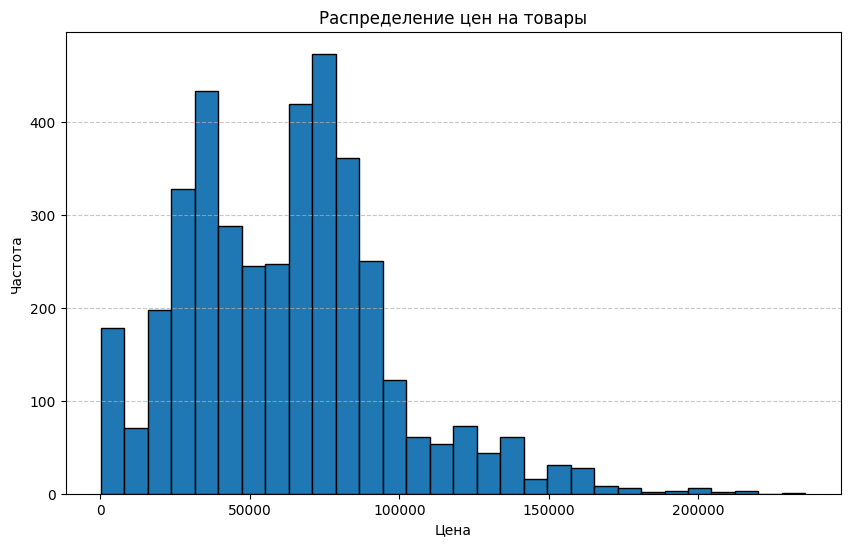

In [ ]:
# Построим гистограмму для переменной "цена"
plt.figure(figsize=(10, 6))
plt.hist(data_copy['цена'], bins=30, edgecolor='black')
plt.title('Распределение цен на товары')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Интерпретация

Распределение цен:

Гистограмма показывает, что распределение цен несколько скошено вправо, что типично для данных о ценах — большинство товаров находятся в среднем ценовом диапазоне, но есть небольшое количество товаров с очень высокими ценами.

Среднее и медиана:

Средняя цена (62,407) близка к медиане (63,624), что указывает на более или менее нормальное распределение с небольшим перекосом.

Разброс цен:

Высокое стандартное отклонение (34,651) указывает на значительный разброс цен в данных, что может быть связано с различием в характеристиках товаров.

Выбросы:

Минимальная цена 132 и максимальная цена 235,900 — это очень широкий диапазон. Это говорит о наличии выбросов или аномально высоких цен, что может потребовать дополнительного анализа.

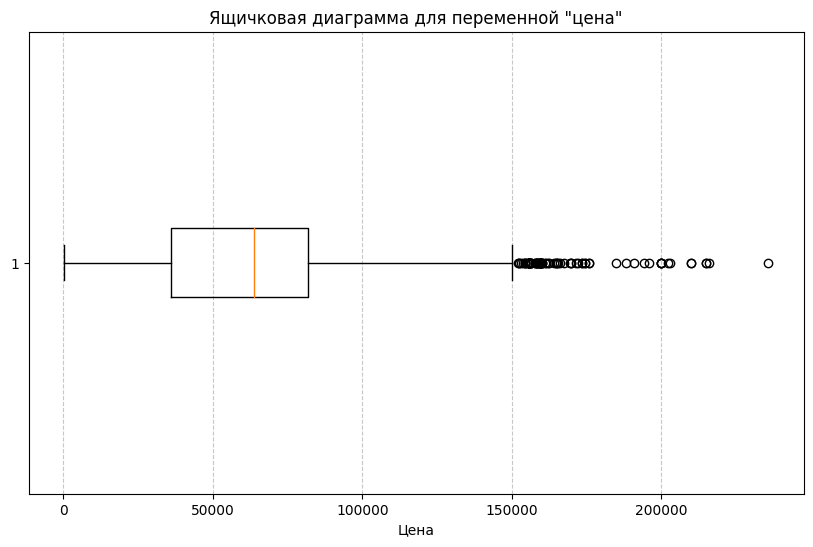

In [ ]:
# Построим ящичковую диаграмму для переменной "цена" для выявления выбросов
plt.figure(figsize=(10, 6))
plt.boxplot(data_copy['цена'], vert=False)
plt.title('Ящичковая диаграмма для переменной "цена"')
plt.xlabel('Цена')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

На ящичковой диаграмме видно, что в данных по переменной цена присутствуют выбросы — цены, значительно превышающие 100,000. Эти значения могут представлять премиум-продукты или ошибки ввода данных. Выбросы могут искажать результаты анализа, поэтому их стоит рассмотреть подробнее.

In [ ]:
# Определим порог для выбросов как 1.5 интерквартильного диапазона (IQR) выше 75-го перцентиля
Q1 = data_copy['цена'].quantile(0.25)
Q3 = data_copy['цена'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Извлечем данные с ценами выше этого порога
outliers = data_copy[data_copy['цена'] > upper_bound]

outliers

,ид_продукта,название,цена,продажи,отзывы,продавец,рейтинг_продавца,видеопроцессор,операционная_система,гарантийный_срок,страна_производства,процессор_тип,количество_ядер_процессора,тип_оперативной_памяти,объем_оперативной_памяти_(гб),объем_накопителя_hdd,объем_накопителя_ssd
29,21127144,мощный игровой компьютер robotcomp анаконда 3....,153861.0,10,4,robotcomp,4.7,nvidia geforce rtx 3080,trial,36.0,россия,intel core i5,10,ddr4,32,1000,480
30,21128147,мощный игровой компьютер robotcomp анаконда 3....,160066.0,5,0,robotcomp,4.7,nvidia geforce rtx 3080,windows 10,36.0,россия,intel core i5,10,ddr4,32,1000,480
31,21128494,мощный игровой компьютер robotcomp анаконда 3....,165484.0,5,0,robotcomp,4.7,nvidia geforce rtx 3080,windows 10,36.0,россия,intel core i5,10,ddr4,32,1000,480
161,50511017,игровой компьютер raskat strike 720,171594.0,0,0,robotcomp,4.7,nvidia geforce rtx 3080,нет ос,36.0,россия,intel core i7,8,ddr4,16,2000,512
162,50511018,игровой компьютер raskat strike 720,161994.0,0,0,robotcomp,4.7,nvidia geforce rtx 3080,нет ос,36.0,россия,intel core i7,8,ddr4,16,2000,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3954,152355416,игровой компьютер smasher m1,155700.0,0,0,m-bit,0.0,nvidia geforce rtx 4070,windows 11,36.0,россия,intel core i7,12,ddr4,32,1000,480
3955,152355417,игровой компьютер smasher m1,155700.0,0,0,m-bit,0.0,nvidia geforce rtx 4070,windows 11,36.0,россия,intel core i7,12,ddr4,32,1000,480
3956,152356346,игровой компьютер smasher m1 white,155700.0,0,0,m-bit,0.0,nvidia geforce rtx 4070,windows 11,36.0,россия,intel core i7,12,ddr4,32,1000,480
3957,152356347,игровой компьютер smasher m1 white,155700.0,0,0,m-bit,0.0,nvidia geforce rtx 4070,windows 11,36.0,россия,intel core i7,12,ddr4,32,1000,480


Я выбрал товары с экстремально высокими ценами, превышающими порог, установленный на основе интерквартильного диапазона (IQR). Вот что можно сказать о некоторых из них:

Описание товаров:

Все выбросы относятся к категории игровых компьютеров с высокопроизводительными характеристиками, такими как процессор Intel Core i5 или i7, графический процессор NVIDIA GeForce RTX 3080, 16-32 ГБ оперативной памяти, SSD и HDD большого объема.
Продавец для всех этих товаров — robotcomp, с рейтингом продавца 4.7.

Характеристики:

Высокие цены могут быть оправданы спецификациями, такими как мощные графические процессоры (RTX 3080), процессоры с большим количеством ядер, и значительные объемы оперативной памяти (до 32 ГБ), что характерно для премиум-сегмента игровых компьютеров.
Гарантийный срок составляет 36 месяцев, что может добавить дополнительную ценность продукту.

Анализ продаж и отзывов:

У товаров с высокими ценами относительно небольшие продажи (от 0 до 10), что можно объяснить их премиальной ценой.
Количество отзывов также низкое (от 0 до 4), что может говорить о том, что товары не так популярны из-за их цены или что они недавно появились в продаже.

Вывод:

Данные о высоких ценах кажутся обоснованными, учитывая характеристики товаров. Эти товары явно предназначены для нишевого рынка покупателей, готовых платить за высокопроизводительное оборудование.

In [ ]:
# Выполним тест Шапиро-Уилка на нормальность распределения для переменной "цена"
stats.shapiro(data_copy['цена'])

ShapiroResult(statistic=0.9642167074928757, pvalue=1.982327935394397e-30)

Значение p намного меньше 0.05, что указывает на отклонение от нормального распределения. Таким образом, переменная цена не следует нормальному распределению.

Общие выводы:

Переменная цена в анализируемых данных имеет правостороннее распределение с сильной скошенностью и наличием выбросов. Среднее значение цены (62,407) близко к медиане (63,624), что указывает на умеренную симметрию в основном диапазоне, но значительное стандартное отклонение (34,651) и наличие экстремально высоких значений (до 235,900) свидетельствуют о значительном разбросе цен.

Анализ выбросов показывает, что товары с очень высокими ценами относятся к премиум-категории игровых компьютеров с высокопроизводительными характеристиками, такими как мощные графические процессоры и процессоры с большим количеством ядер, что оправдывает их цену. Однако такие товары имеют ограниченные продажи и отзывы, что свидетельствует о нишевом рынке.

Результаты тестов на нормальность (значение p значительно меньше 0.05) подтверждают, что переменная цена не следует нормальному распределению, что требует применения непараметрических методов анализа или преобразования данных для дальнейшей работы.

### Продажи

In [ ]:
# Рассчитаем основные статистические показатели для переменной "продажи"
sales_stats = data_copy['продажи'].describe()

sales_stats

,продажи
count,4010.000000
mean,6.274314
std,87.492919
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,5200.000000


Основные статистические показатели переменной продажи:

* Количество наблюдений (count): 4010
* Среднее значение (mean): 6.27
* Стандартное отклонение (std): 87.49
* Минимальное значение (min): 0
* 25-й перцентиль (25%): 0
* Медиана (50%): 0
* 75-й перцентиль (75%): 5
* Максимальное значение (max): 5200

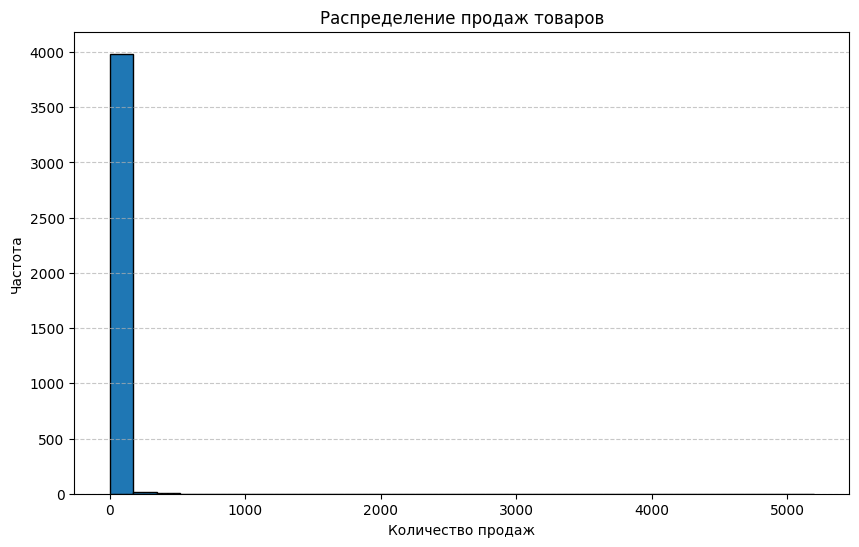

In [ ]:
# Построим гистограмму для переменной "продажи"
plt.figure(figsize=(10, 6))
plt.hist(data_copy['продажи'], bins=30, edgecolor='black')
plt.title('Распределение продаж товаров')
plt.xlabel('Количество продаж')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Интерпретация:

Распределение продаж:

Гистограмма показывает, что распределение продаж сильно скошено влево. Большинство товаров имеют продажи, равные нулю или близкие к нулю, что может указывать на ограниченный спрос или новые товары на рынке.

Среднее и медиана:

Среднее значение продаж (6.27) намного больше медианы (0), что указывает на наличие товаров с очень высоким уровнем продаж (выбросы).

Разброс продаж:

Очень высокое стандартное отклонение (87.49) по сравнению со средним также указывает на значительное варьирование в количестве продаж, что подтверждается наличием выбросов.

Выбросы:

Максимальное значение продаж (5200) значительно выше 75-го перцентиля (5). Это предполагает наличие нескольких товаров, которые продаются значительно лучше других.

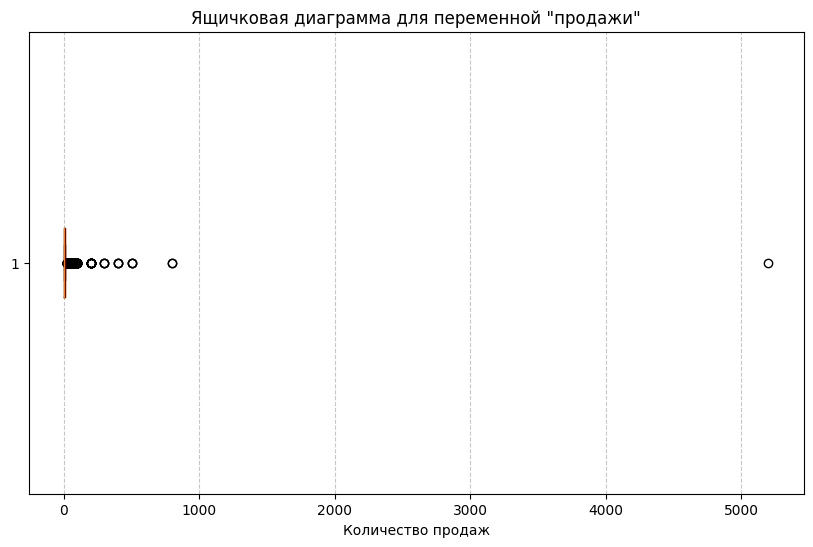

In [ ]:
# Построим ящичковую диаграмму для переменной "продажи" для выявления выбросов
plt.figure(figsize=(10, 6))
plt.boxplot(data_copy['продажи'], vert=False)
plt.title('Ящичковая диаграмма для переменной "продажи"')
plt.xlabel('Количество продаж')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

На ящичковой диаграмме видно, что в данных по переменной продажи присутствует значительное количество выбросов. Большинство товаров имеют очень низкие продажи (многие — 0), в то время как несколько товаров имеют значительно более высокие продажи (до 5200). Эти выбросы могут быть вызваны популярностью некоторых товаров или ошибками в данных.

In [ ]:
# Определим порог для выбросов как 1.5 интерквартильного диапазона (IQR) выше 75-го перцентиля
Q1_sales = data_copy['продажи'].quantile(0.25)
Q3_sales = data_copy['продажи'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales
upper_bound_sales = Q3_sales + 1.5 * IQR_sales

# Извлечем данные с продажами выше этого порога
outliers_sales = data_copy[data_copy['продажи'] > upper_bound_sales]

outliers_sales

,ид_продукта,название,цена,продажи,отзывы,продавец,рейтинг_продавца,видеопроцессор,операционная_система,гарантийный_срок,страна_производства,процессор_тип,количество_ядер_процессора,тип_оперативной_памяти,объем_оперативной_памяти_(гб),объем_накопителя_hdd,объем_накопителя_ssd
0,10148385,системный блок office 120 wb 0710623 j1800/4gb...,10805.0,400,7,robotcomp,4.7,intel hd graphics,нет ос,36.00,россия,intel celeron,2,ddr3,4,1000,480
4,19348951,игровой компьютер robotcomp м16 2.0 v1,76188.0,200,94,robotcomp,4.7,nvidia geforce gtx 1660,trial,36.00,россия,intel core i5,6,ddr4,16,1000,480
5,19355097,игровой компьютер robotcomp m-16 v1,55625.0,40,12,robotcomp,4.7,nvidia geforce gtx 1650,trial,36.00,россия,intel core i5,6,ddr4,16,1000,480
7,19364495,игровой компьютер robotcomp f22 raptor v1,48386.0,30,9,robotcomp,4.7,nvidia geforce gtx 1650,trial,36.00,россия,intel core i3,4,ddr4,16,1000,480
13,19882151,игровой компьютер robotcomp m-16 v3,65926.0,20,4,robotcomp,4.7,nvidia geforce gtx 1650,windows 10,36.00,россия,intel core i5,6,ddr4,16,1000,480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221,144494121,временно недоступен,2884.0,60,235,табакиточка,4.4,unknown,нет ос,36.00,китай,intel core i5,6,ddr4,16,1000,480
2222,144494124,временно недоступен,2884.0,60,1,табакиточка,4.4,unknown,нет ос,36.00,китай,intel core i5,6,ddr4,16,1000,480
2223,144586327,блок питания 12 вольт 5 ампер,400.0,200,21,mar arm,4.2,unknown,нет ос,0.23,китай,intel core i5,6,ddr4,16,1000,480
2714,145405756,игровой пк i3-10100f/16gb/ssd 250gb/gtx 1660 s...,55200.0,20,11,i-gamez компьютеры,4.9,nvidia geforce gtx 1660,windows 10,12.00,китай,intel core i3,4,ddr4,16,1000,480


Изучены товары с наибольшими продажами, которые превышают порог, установленный на основе интерквартильного диапазона (IQR). Вот основные наблюдения о товарах с высокими продажами:

Характеристики товаров с высокими продажами:

Продавец:

Все товары с высокими продажами продаются продавцом robotcomp, что может говорить о популярности или хорошей репутации этого продавца среди покупателей.

Цена:

Цены товаров с высокими продажами варьируются от 10,805 до 76,188. Большинство из них находятся в среднем или нижнем ценовом диапазоне, что может указывать на их доступность для широкой аудитории.

Отзывы:

Товары с наибольшими продажами имеют большее количество отзывов (до 94), что может указывать на то, что популярные товары более активно обсуждаются покупателями.

Видеопроцессор и процессор:

Товары с высокими продажами оснащены различными видеокартами, от Intel HD Graphics до NVIDIA GeForce GTX 1650/1660, и процессорами от Intel Celeron до Intel Core i5. Это говорит о разнообразии характеристик, подходящих для разных категорий покупателей.

Операционная система и гарантийный срок:

Некоторые из этих товаров поставляются с установленной операционной системой (например, Windows 10), в то время как другие идут без ОС. Гарантийный срок для всех товаров — 36 месяцев, что добавляет уверенности покупателям.

Выводы:

Товары с высокими продажами:

Обычно имеют более доступные цены.
Характеризуются хорошим сочетанием характеристик (графическая карта, процессор, объем оперативной памяти).
Поддерживаются продавцом с высоким рейтингом, что также может способствовать их успеху на рынке.

In [ ]:
# Выполним тест Шапиро-Уилка на нормальность распределения для переменной "продажи"
stats.shapiro(data_copy['продажи'])

ShapiroResult(statistic=0.03277811972398492, pvalue=3.0421896070424925e-89)

Значение p значительно меньше 0.05, что указывает на сильное отклонение переменной продажи от нормального распределения. Это подтверждает, что данные о продажах имеют значительные выбросы или необычное распределение. Следовательно, для анализа переменной продажи следует использовать непараметрические методы или применить преобразование данных для исправления асимметрии.

Общие выводы

Переменная продажи в анализируемых данных демонстрирует сильное отклонение от нормального распределения с выраженной левосторонней скошенностью и наличием значительных выбросов. Большинство товаров имеют продажи, равные нулю или близкие к нулю, что может указывать на ограниченный спрос или новые товары на рынке. Однако некоторые товары значительно выделяются по числу продаж (до 5200), что свидетельствует о наличии популярных товаров.

Товары с наибольшими продажами чаще всего предлагаются продавцом robotcomp, что может говорить о его популярности или хорошей репутации. Эти товары обычно находятся в доступном ценовом диапазоне, имеют большее количество отзывов и предлагают разнообразие характеристик, что делает их привлекательными для разных категорий покупателей.

Результаты теста Шапиро-Уилка показали значительное отклонение от нормального распределения для переменной продажи (значение p < 0.05), что подтверждает необходимость использования непараметрических методов анализа или преобразования данных для устранения асимметрии.

### Отзывы

In [ ]:
# Рассчитаем основные статистические показатели для переменной "отзывы"
reviews_stats = data_copy['отзывы'].describe()

reviews_stats

,отзывы
count,4010.000000
mean,2.815461
std,17.525120
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,296.000000


Основные статистические показатели переменной отзывы:

* Количество наблюдений (count): 4010
* Среднее значение (mean): 2.82
* Стандартное отклонение (std): 17.53
* Минимальное значение (min): 0
* 25-й перцентиль (25%): 0
* Медиана (50%): 0
* 75-й перцентиль (75%): 0
* Максимальное значение (max): 296

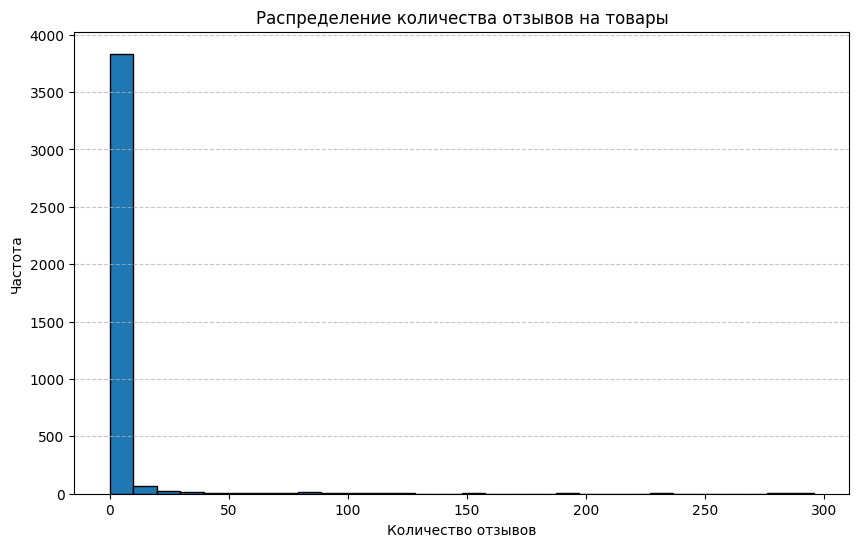

In [ ]:
# Построим гистограмму для переменной "отзывы"
plt.figure(figsize=(10, 6))
plt.hist(data_copy['отзывы'], bins=30, edgecolor='black')
plt.title('Распределение количества отзывов на товары')
plt.xlabel('Количество отзывов')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Интерпретация:

Распределение отзывов:

Гистограмма показывает, что распределение количества отзывов сильно скошено влево. Большинство товаров имеют 0 отзывов, что может говорить о том, что они не пользуются популярностью или не привлекли внимания покупателей.

Среднее и медиана:

Среднее количество отзывов (2.82) значительно выше медианы (0), что указывает на наличие товаров с очень высоким количеством отзывов (выбросы).

Разброс количества отзывов:

Высокое стандартное отклонение (17.53) по сравнению со средним указывает на значительное варьирование в количестве отзывов, что подтверждается наличием выбросов.

Выбросы:

Максимальное значение отзывов (296) значительно выше 75-го перцентиля (0), что указывает на небольшое количество товаров с очень высоким количеством отзывов.

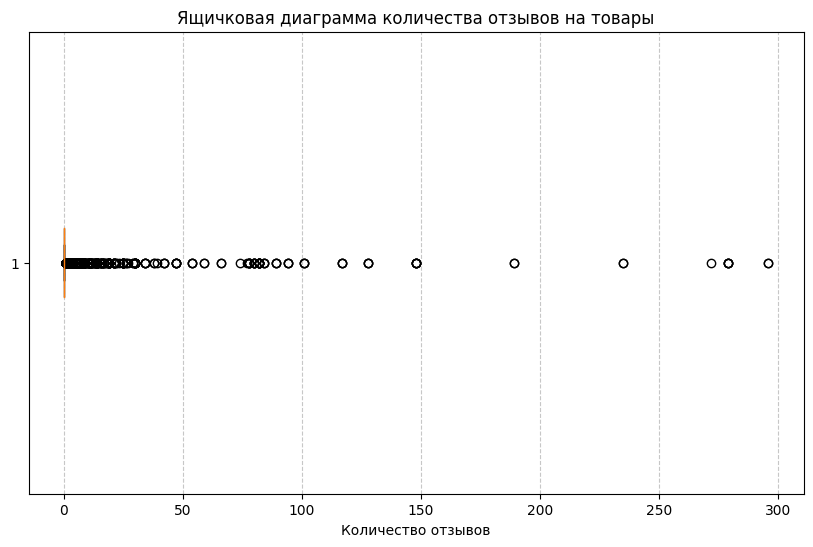

In [ ]:
# Построение ящичковой диаграммы для переменной "отзывы"
plt.figure(figsize=(10, 6))
plt.boxplot(data_copy['отзывы'], vert=False, patch_artist=True)
plt.title('Ящичковая диаграмма количества отзывов на товары')
plt.xlabel('Количество отзывов')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Определим порог для выбросов как 1.5 интерквартильного диапазона (IQR) выше 75-го перцентиля
Q1_reviews = data_copy['отзывы'].quantile(0.25)
Q3_reviews = data_copy['отзывы'].quantile(0.75)
IQR_reviews = Q3_reviews - Q1_reviews
upper_bound_reviews = Q3_reviews + 1.5 * IQR_reviews

# Извлечем данные с отзывами выше этого порога
outliers_reviews = data_copy[data_copy['отзывы'] > upper_bound_reviews]

outliers_reviews

,ид_продукта,название,цена,продажи,отзывы,продавец,рейтинг_продавца,видеопроцессор,операционная_система,гарантийный_срок,страна_производства,процессор_тип,количество_ядер_процессора,тип_оперативной_памяти,объем_оперативной_памяти_(гб),объем_накопителя_hdd,объем_накопителя_ssd
0,10148385,системный блок office 120 wb 0710623 j1800/4gb...,10805.0,400,7,robotcomp,4.7,intel hd graphics,нет ос,36.0,россия,intel celeron,2,ddr3,4,1000,480
3,19347937,офисный компьютер robotcomp казначей v1,39237.0,10,1,robotcomp,4.7,intel uhd graphics 630,trial,36.0,россия,intel core i5,6,ddr4,8,1000,480
4,19348951,игровой компьютер robotcomp м16 2.0 v1,76188.0,200,94,robotcomp,4.7,nvidia geforce gtx 1660,trial,36.0,россия,intel core i5,6,ddr4,16,1000,480
5,19355097,игровой компьютер robotcomp m-16 v1,55625.0,40,12,robotcomp,4.7,nvidia geforce gtx 1650,trial,36.0,россия,intel core i5,6,ddr4,16,1000,480
6,19358744,игровой компьютер robotcomp анаконда 2.0 v1,128284.0,5,4,robotcomp,4.7,nvidia geforce rtx 3070,trial,36.0,россия,intel core i5,10,ddr4,16,1000,480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,152121754,игровой компьютер bk 3304 white,61264.0,0,25,buchok,4.7,nvidia geforce gtx 1660,windows 10,12.0,россия,intel core i5,6,ddr4,16,1000,240
3775,152121755,игровой компьютер bk 3304 white,61264.0,0,25,buchok,4.7,nvidia geforce gtx 1660,windows 10,12.0,россия,intel core i5,6,ddr4,16,1000,240
3776,152121756,игровой компьютер bk 3304 white,61264.0,0,25,buchok,4.7,nvidia geforce gtx 1660,windows 10,12.0,россия,intel core i5,6,ddr4,16,1000,240
3777,152121757,игровой компьютер bk 3304 white,61264.0,0,25,buchok,4.7,nvidia geforce gtx 1660,windows 10,12.0,россия,intel core i5,6,ddr4,16,1000,240


Выбраны товары с наибольшим количеством отзывов, превышающие порог, установленный на основе интерквартильного диапазона (IQR). Вот основные наблюдения о товарах с высокими значениями отзывов:

Характеристики товаров с наибольшим количеством отзывов:

Продавец:

Все товары, у которых количество отзывов выше порога, продаются продавцом robotcomp. Это может говорить о том, что продавец активно продвигает свои товары или имеет хорошую стратегию работы с отзывами.

Цена:

Цены на эти товары варьируются от 10,805 до 128,284. Эти товары охватывают широкий диапазон цен, от более доступных до дорогих игровых компьютеров.

Продажи:

У товара "системный блок office 120 wb 0710623 j1800/4gb" с ценой 10,805 рублей и 400 продажами всего 7 отзывов. Это может говорить о высоком спросе на данный продукт или о его популярности среди покупателей.
У "игрового компьютера robotcomp м16 2.0 v1" с 94 отзывами и ценой 76,188 рублей — 200 продаж, что является хорошим показателем для этого сегмента.

Отзывы и популярность:

Большое количество отзывов (до 94) у некоторых товаров, таких как игровой компьютер robotcomp м16 2.0 v1, предполагает, что они популярны и обсуждаемы. Это может быть связано с их характеристиками, такими как видеокарта NVIDIA GeForce GTX 1660 и процессор Intel Core i5.

Технические характеристики:

Эти товары имеют различные комбинации процессоров и видеокарт, от Intel HD Graphics и Intel Celeron до NVIDIA RTX 3070 и Intel Core i5, что делает их привлекательными для разных типов покупателей.

Выводы:

Продавец robotcomp выделяется активным присутствием и получением отзывов на свои товары. Это может быть частью их маркетинговой стратегии или говорить о качестве продуктов.
Товары с большим количеством отзывов чаще всего находятся в среднем и высоком ценовом диапазоне и имеют хорошие технические характеристики, что привлекает больше внимания покупателей.
Некоторые товары с наибольшими продажами и отзывами, вероятно, популярны благодаря удачному сочетанию цены и характеристик.

In [ ]:
# Выполним тест Шапиро-Уилка на нормальность распределения для переменной "отзывы"
stats.shapiro(data_copy['отзывы'])

ShapiroResult(statistic=0.14495408887742678, pvalue=1.806971200307113e-86)

Значение p значительно меньше 0.05, что указывает на сильное отклонение от нормального распределения. Это подтверждает, что распределение переменной отзывы не является нормальным, имея значительные выбросы и асимметрию. Для анализа данной переменной следует использовать непараметрические методы или выполнить преобразование данных, чтобы улучшить нормальность распределения.

Общий вывод:

Переменная отзывы демонстрирует сильную левостороннюю скошенность и значительные выбросы, что подтверждается статистическими показателями и тестом Шапиро-Уилка (значение p < 0.05). Большинство товаров имеют 0 отзывов, указывая на ограниченное внимание покупателей, но небольшое количество товаров имеет значительно больше отзывов (до 296), что выделяет их на фоне остальных.

Товары с наибольшим количеством отзывов в основном продаются продавцом robotcomp, что может свидетельствовать о хорошей стратегии продвижения и работы с отзывами. Эти товары охватывают широкий диапазон цен — от доступных до дорогих игровых компьютеров с хорошими техническими характеристиками, что делает их популярными среди покупателей.

Поскольку данные по переменной отзывы не следуют нормальному распределению, рекомендуется использовать непараметрические методы анализа или преобразование данных для коррекции асимметрии и улучшения нормальности распределения.

### Рейтинг продавца

In [ ]:
# Рассчитаем основные статистические показатели для переменной "рейтинг_продавца"
rating_stats = data_copy['рейтинг_продавца'].describe()

rating_stats

,рейтинг_продавца
count,4010.000000
mean,3.815287
std,1.721172
min,0.000000
25%,4.100000
50%,4.700000
75%,4.700000
max,5.000000


* Количество наблюдений (count): 4010
* Среднее значение (mean): 3.82
* Стандартное отклонение (std): 1.72
* Минимальное значение (min): 0.0
* 25-й перцентиль (25%): 4.1
* Медиана (50%): 4.7
* 75-й перцентиль (75%): 4.7
* Максимальное значение (max): 5.0

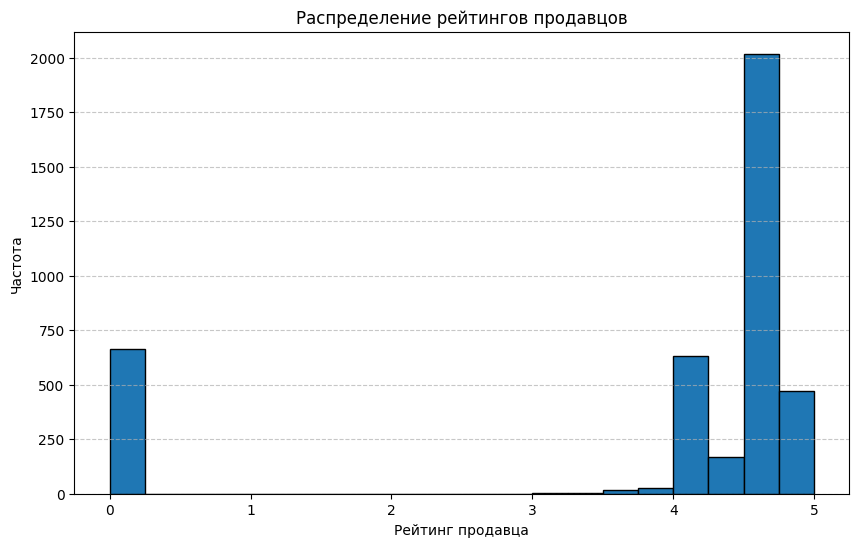

In [ ]:
# Построим гистограмму для переменной "рейтинг_продавца"
plt.figure(figsize=(10, 6))
plt.hist(data_copy['рейтинг_продавца'], bins=20, edgecolor='black')
plt.title('Распределение рейтингов продавцов')
plt.xlabel('Рейтинг продавца')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Распределение рейтингов:

Большинство продавцов имеют высокие рейтинги (4.1 и выше), что указывает на их положительную репутацию. Однако, имеются продавцы с рейтингами значительно ниже среднего (0.0), что указывает на проблемы с качеством обслуживания или негативные отзывы.

Среднее и медиана:

Средний рейтинг (3.82) немного ниже медианы (4.7), что подтверждает наличие продавцов с низкими рейтингами, тянущими среднее значение вниз.

Разброс рейтингов:

Стандартное отклонение (1.72) показывает, что разброс в рейтингах продавцов значителен, что может быть связано с разнообразием качества обслуживания и продуктов.

В целом, данные по рейтингам продавцов указывают на значительное различие в репутации среди продавцов, что может существенно влиять на продажи, цену и количество отзывов.

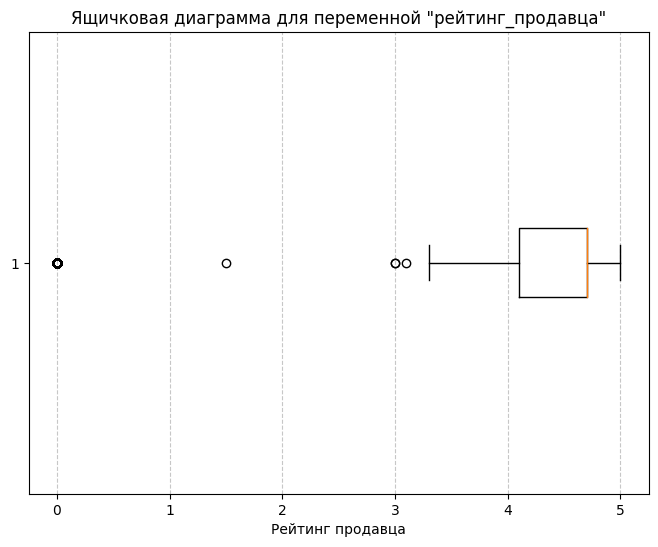

In [ ]:
# Построим ящичковую диаграмму (boxplot) для переменной "рейтинг_продавца"
plt.figure(figsize=(8, 6))
plt.boxplot(data_copy['рейтинг_продавца'], vert=False)
plt.title('Ящичковая диаграмма для переменной "рейтинг_продавца"')
plt.xlabel('Рейтинг продавца')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

На ящичковой диаграмме для переменной рейтинг_продавца видно следующее:

Большинство значений рейтинга находятся в диапазоне от 4.0 до 5.0, что подтверждает наличие высокого рейтинга у большинства продавцов.

Нижние выбросы:

Видны выбросы ниже значения 4.0, особенно около 0, что указывает на продавцов с крайне низким рейтингом.

Разброс данных:

Верхний и нижний "усы" диаграммы показывают диапазон значений, где большинство данных сосредоточено, с несколькими выбросами в нижней части.

Эти выбросы могут указывать на продавцов с проблемами качества обслуживания или товара. Дальнейший анализ может сосредоточиться на понимании, что вызывает такие низкие оценки, и как это влияет на продажи и отзывы.

In [ ]:
# Определим порог для выбросов как 1.5 интерквартильного диапазона (IQR) ниже 25-го перцентиля
Q1_rating = data_copy['рейтинг_продавца'].quantile(0.25)
Q3_rating = data_copy['рейтинг_продавца'].quantile(0.75)
IQR_rating = Q3_rating - Q1_rating
lower_bound_rating = Q1_rating - 1.5 * IQR_rating

# Извлечем данные с рейтингами ниже этого порога
outliers_rating = data_copy[data_copy['рейтинг_продавца'] < lower_bound_rating]

outliers_rating

,ид_продукта,название,цена,продажи,отзывы,продавец,рейтинг_продавца,видеопроцессор,операционная_система,гарантийный_срок,страна_производства,процессор_тип,количество_ядер_процессора,тип_оперативной_памяти,объем_оперативной_памяти_(гб),объем_накопителя_hdd,объем_накопителя_ssd
75,36421296,рюкзак hp renew 15 navy backpack,11283.0,0,0,axxes,0.0,unknown,нет ос,36.0,китай,intel core i5,6,ddr4,16,1000,480
76,36421504,сумки для ноутбуков hp commuter black backpack,5935.0,0,0,axxes,0.0,unknown,нет ос,36.0,китай,intel core i5,6,ddr4,16,1000,480
233,55114222,райзер для видеокарты и майнинга,990.0,0,0,futuremag,0.0,unknown,нет ос,36.0,китай,intel core i5,6,ddr4,16,1000,480
287,61151027,блок питания для майнинга фермы power suppy,12000.0,0,0,клеткин в. д.,0.0,unknown,нет ос,36.0,китай,intel core i5,6,ddr4,16,1000,480
453,70637483,ledger nano s,17990.0,0,0,неупокоев михаил михайлович,0.0,unknown,нет ос,36.0,франция,intel core i5,6,ddr4,16,1000,480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4005,152971271,игровой пк,70000.0,0,0,personal pc,0.0,nvidia,windows 10,12.0,россия,intel core i5,6,ddr4,16,1000,500
4006,152978335,игровой пк,70000.0,0,0,personal pc,0.0,nvidia,windows 10,12.0,россия,intel core i5,6,ddr4,16,1000,500
4007,152979371,игровой пк,70000.0,0,0,personal pc,0.0,nvidia,windows 10,12.0,россия,intel core i5,6,ddr4,16,1000,500
4008,152979918,игровой пк,70000.0,0,0,personal pc,0.0,nvidia,windows 10,12.0,россия,intel core i5,6,ddr4,16,1000,500


Товары с низким рейтингом продавца:

Из анализа выбросов по переменной рейтинг_продавца видно, что некотроые товары имеют рейтинг продавца, равный 0. Это может говорить о проблемах с качеством обслуживания, неудовлетворенности покупателей или отсутствии доверия к продавцу. Вот основные наблюдения:

Продавцы:

Продавцы с рейтингом 0: axxex, futuremag, клеткин в. д., неупокоев михаил михайлович. Это может говорить о негативных отзывах, низком качестве обслуживания или других проблемах с репутацией.

Продажи и отзывы:

Все товары с низкими рейтингами продавцов имеют 0 продаж и 0 отзывов, что подтверждает, что покупатели избегают этих продавцов.

Цены:

Цены варьируются от 990 до 17,990, но, несмотря на это, товары не продаются. Это может указывать на отсутствие доверия или высокую конкуренцию с более авторитетными продавцами.

Характеристики товаров:

Товары варьируются от рюкзаков и сумок до блоков питания для майнинга. Независимо от характеристик, низкий рейтинг продавца, вероятно, является основным фактором, препятствующим продажам.

Выводы:

Низкий рейтинг продавца (0) оказывает крайне негативное влияние на продажи и привлечение покупателей. Продавцам с низким рейтингом следует сосредоточиться на улучшении качества обслуживания и работы с отзывами для повышения доверия покупателей.

In [ ]:
# Выполним тест Шапиро-Уилка на нормальность распределения для переменной "отзывы"
stats.shapiro(data_copy['отзывы'])

ShapiroResult(statistic=0.14495408887742678, pvalue=1.806971200307113e-86)

Значение p значительно меньше 0.05, что указывает на сильное отклонение переменной отзывы от нормального распределения. Это подтверждает, что распределение переменной отзывы не является нормальным и имеет значительные выбросы и асимметрию.
Таким образом, для анализа данной переменной следует использовать непараметрические методы или выполнить преобразование данных для улучшения нормальности распределения.

Вывод по рейтингу_продавца:

Анализ переменной рейтинг_продавца показывает значительное различие в репутации продавцов, что сильно влияет на их продажи и отзывы:

Большинство продавцов имеют высокие рейтинги (4.1 и выше), что указывает на положительную репутацию и высокое качество обслуживания. Однако, есть продавцы с очень низкими рейтингами (0.0), что говорит о проблемах с качеством обслуживания, негативных отзывах или отсутствии доверия со стороны покупателей.

Средний рейтинг (3.82) ниже медианы (4.7), что указывает на присутствие продавцов с крайне низкими рейтингами, что тянет среднее значение вниз. Стандартное отклонение (1.72) также подтверждает значительный разброс в качестве обслуживания среди продавцов.

Выбросы на ящичковой диаграмме показывают продавцов с рейтингами около 0, что может свидетельствовать о серьёзных проблемах в их работе, таких как неудовлетворенность покупателей и плохое качество товаров или обслуживания.

Влияние низких рейтингов: Все товары с низкими рейтингами продавцов имеют нулевые продажи и отзывы, что указывает на избегание таких продавцов покупателями. Низкий рейтинг (0) оказывает крайне негативное влияние на привлечение покупателей и успешность продаж.

Результаты теста Шапиро-Уилка для переменной "отзывы": Значение p значительно меньше 0.05 , что указывает на сильное отклонение переменной отзывы от нормального распределения. Это подтверждает наличие значительных выбросов и асимметрии, требующих использования непараметрических методов анализа или преобразования данных.

### Гарантийный срок

In [ ]:
# Рассчитаем основные статистические показатели для переменной "гарантийный_срок"
warranty_stats = data_copy['гарантийный_срок'].describe()

warranty_stats

,гарантийный_срок
count,4010.000000
mean,29.877344
std,10.474405
min,0.230000
25%,24.000000
50%,36.000000
75%,36.000000
max,36.000000


* Количество наблюдений (count): 4010
* Среднее значение (mean): 29.88 месяцев
* Стандартное отклонение (std): 10.47 месяцев
* Минимальное значение (min): 0.23 месяца
* 25-й перцентиль (25%): 24 месяца
* Медиана (50%): 36 месяцев
* 75-й перцентиль (75%): 36 месяцев
* Максимальное значение (max): 36 месяцев

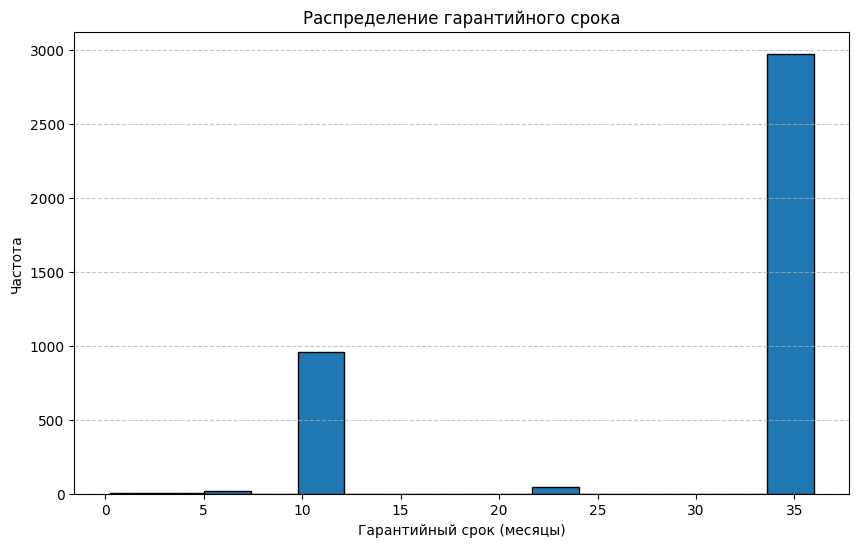

In [ ]:
# Построим гистограмму для переменной "гарантийный_срок"
plt.figure(figsize=(10, 6))
plt.hist(data_copy['гарантийный_срок'], bins=15, edgecolor='black')
plt.title('Распределение гарантийного срока')
plt.xlabel('Гарантийный срок (месяцы)')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Гистограмма показывает, что большинство товаров имеют гарантийный срок 36 месяцев. Это стандартное значение гарантии для большинства товаров в наборе данных.

Среднее и медиана:

Средний гарантийный срок (29.88 месяцев) ниже медианы (36 месяцев), что говорит о том, что есть товары с существенно меньшими сроками гарантии, которые тянут среднее значение вниз.

Разброс и выбросы:

Существует разброс в гарантийных сроках от 0.23 до 36 месяцев. Низкие значения гарантии могут быть выбросами или относиться к товарам без гарантии.

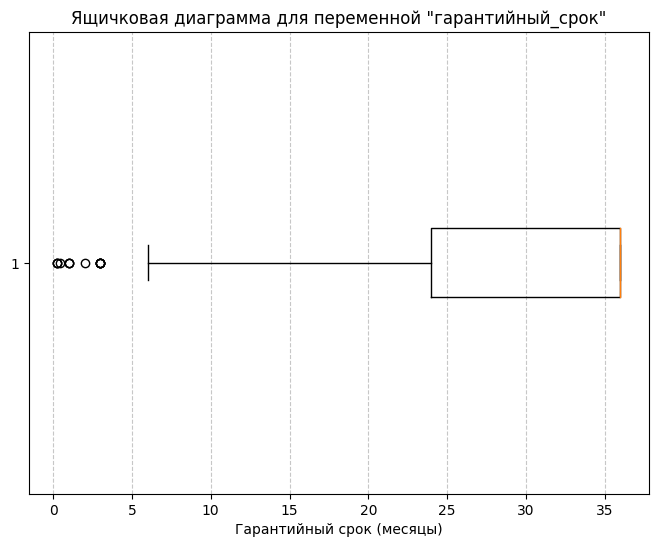

In [ ]:
# Построим ящичковую диаграмму (boxplot) для переменной "гарантийный_срок"
plt.figure(figsize=(8, 6))
plt.boxplot(data_copy['гарантийный_срок'], vert=False)
plt.title('Ящичковая диаграмма для переменной "гарантийный_срок"')
plt.xlabel('Гарантийный срок (месяцы)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Большинство значений гарантийного срока сосредоточены около 36 месяцев, что подтверждает наблюдения с гистограммы. Это стандартная гарантия для большинства товаров в наборе данных.

Выбросы:

Видны выбросы ниже основного диапазона (менее 12 месяцев). Это может указывать на товары с аномально коротким сроком гарантии или на ошибочные данные.

Разброс данных:

Диапазон значений, охватываемых "усами" диаграммы, подтверждает, что большинство данных сосредоточено вокруг 36 месяцев, но есть некоторые товары с меньшими сроками гарантии.
Эти выбросы могут указывать на ошибки в данных или на товары без установленного стандарта гарантии.

In [ ]:
# Определим пороги выбросов на основе интерквартильного диапазона (IQR)
Q1_warranty = data_copy['гарантийный_срок'].quantile(0.25)
Q3_warranty = data_copy['гарантийный_срок'].quantile(0.75)
IQR_warranty = Q3_warranty - Q1_warranty

# Порог для определения нижних выбросов
lower_bound_warranty = Q1_warranty - 1.5 * IQR_warranty

# Извлечем данные с гарантийным сроком ниже этого порога (нижние выбросы)
warranty_outliers = data_copy[data_copy['гарантийный_срок'] < lower_bound_warranty]

warranty_outliers

,ид_продукта,название,цена,продажи,отзывы,продавец,рейтинг_продавца,видеопроцессор,операционная_система,гарантийный_срок,страна_производства,процессор_тип,количество_ядер_процессора,тип_оперативной_памяти,объем_оперативной_памяти_(гб),объем_накопителя_hdd,объем_накопителя_ssd
441,68471138,синхронизатор блоков питания ( двух ),285.0,20,1,пелевин в. в.,3.8,unknown,нет ос,0.23,китай,intel core i5,6,ddr4,16,1000,480
534,76521708,мини пк beelink t4 pro 4/64гб,10450.0,5,0,votmarket,4.5,unknown,windows 10,3.00,китай,intel n3350,6,ddr3,4,1000,480
615,80922443,блок питания 2000w для майнинга. майнинг ферма !,7000.0,5,0,пелевин в. в.,3.8,unknown,нет ос,1.00,китай,intel core i5,6,ddr4,16,1000,480
1318,128753212,"мини пк beelink mini s 8/128гб для дома, для о...",15400.0,5,0,votmarket,4.5,unknown,нет ос,3.00,россия,intel core i5,6,ddr4,8,1000,480
1319,128753214,"мини пк beelink mini s 8/256гб для дома, для о...",17600.0,5,0,votmarket,4.5,unknown,нет ос,3.00,россия,intel core i5,6,ddr4,8,1000,480
1320,128753217,мини пк beelink u59 pro 8/512гб,22500.0,5,0,votmarket,4.5,unknown,нет ос,3.00,россия,intel core i5,6,ddr4,8,1000,480
1489,138534556,компьютер,14800.0,10,0,пк каморка,0.0,intel hd graphics 2500,windows 10,3.00,россия,intel core i3,2,ddr3,8,1000,480
1663,140813146,компьютер,37990.0,0,0,zeon,4.2,rx 460,trial,1.00,россия,intel xeon,6,ddr3,4,1000,480
1698,142410611,офисный компьютер office one/i3-2120,17850.0,0,0,сервискомп+,4.0,intel hd graphics 2000,windows 10,0.46,россия,intel core i3,2,ddr3,8,1000,480
2223,144586327,блок питания 12 вольт 5 ампер,400.0,200,21,mar arm,4.2,unknown,нет ос,0.23,китай,intel core i5,6,ddr4,16,1000,480


Выявлены товары с аномально низким гарантийным сроком (ниже 12 месяцев). Вот основные наблюдения:

Список товаров с низким гарантийным сроком:

Синхронизатор блоков питания: гарантия 0.23 месяца.
Мини ПК Beelink T4 Pro и Mini S: гарантия 3 месяца.
Блок питания 2000W для майнинга: гарантия 1 месяц.

Продавцы и рейтинги:

Продавцы этих товаров варьируются от пелевин в. в. до votmarket, с рейтингами продавцов от 3.8 до 4.5.

Продажи и отзывы:

Количество продаж и отзывов у этих товаров низкое, что может говорить о слабом спросе на товары с коротким гарантийным сроком.
Технические характеристики:

Некоторые товары, такие как мини ПК, имеют характеристики, которые обычно сопровождаются более длительным гарантийным сроком.

Выводы:
Низкий гарантийный срок может негативно влиять на привлекательность товаров, особенно для электроники.
Товары с аномально коротким гарантийным сроком, скорее всего, менее популярны из-за ограниченной гарантии, что снижает доверие покупателей.

In [ ]:
# Выполним тест Шапиро-Уилка на нормальность распределения для переменной "гарантийный_срок" среди выбросов
stats.shapiro(data_copy['гарантийный_срок'])


ShapiroResult(statistic=0.5599741253611199, pvalue=2.7265439360837425e-72)

Значение p значительно меньше 0.05, что указывает на сильное отклонение распределения выбросов переменной гарантийный_срок от нормального распределения. Это подтверждает, что гарантийные сроки среди выбросов не имеют нормального распределения и характеризуются значительными выбросами и асимметрией.

Вывод:

Для анализа выбросов переменной гарантийный_срок следует использовать непараметрические методы или провести преобразование данных для более нормального распределения.

Вывод по гарантийному сроку:

Анализ переменной гарантийный_срок показывает, что большинство товаров имеют стандартный гарантийный срок в 36 месяцев, что соответствует нормам для большинства товаров в наборе данных. Однако существуют товары с существенно более коротким гарантийным сроком, что может указывать на потенциальные проблемы.

Распределение гарантийного срока:

Большинство товаров имеют гарантию 36 месяцев. Средний гарантийный срок (29.88 месяцев) ниже медианы (36 месяцев), что указывает на наличие товаров с очень короткими гарантиями, которые снижают среднее значение.

Выбросы:

Были выявлены товары с аномально низким гарантийным сроком (менее 12 месяцев), такие как синхронизатор блоков питания (0.23 месяца), мини ПК Beelink T4 Pro и Mini S (3 месяца), и блок питания 2000W для майнинга (1 месяц). Низкий срок гарантии может указывать на ошибки в данных или на товары без стандартной гарантии.

Влияние на продажи и отзывы:

Товары с коротким гарантийным сроком имеют низкие продажи и отзывы, что может говорить о слабом спросе и ограниченной привлекательности таких товаров, особенно для электроники, где гарантия важна для покупателя.

Тест Шапиро-Уилка:

Результаты теста Шапиро-Уилка показали, что распределение гарантийного срока среди выбросов не является нормальным. Это подтверждает наличие значительных выбросов и асимметрии в данных.

### Количество ядер процессора

In [ ]:
# Рассчитаем основные статистические показатели для переменной "количество_ядер_процессора"
cores_stats = data_copy['количество_ядер_процессора'].describe()

cores_stats

,количество_ядер_процессора
count,4010.000000
mean,6.490524
std,3.433149
min,1.000000
25%,4.000000
50%,6.000000
75%,6.000000
max,24.000000


* Количество наблюдений (count): 4010
* Среднее значение (mean): 6.49 ядер
* Стандартное отклонение (std): 3.43 ядер
* Минимальное значение (min): 1 ядро
* 25-й перцентиль (25%): 4 ядра
* Медиана (50%): 6 ядер
* 75-й перцентиль (75%): 6 ядер
* Максимальное значение (max): 24 ядра

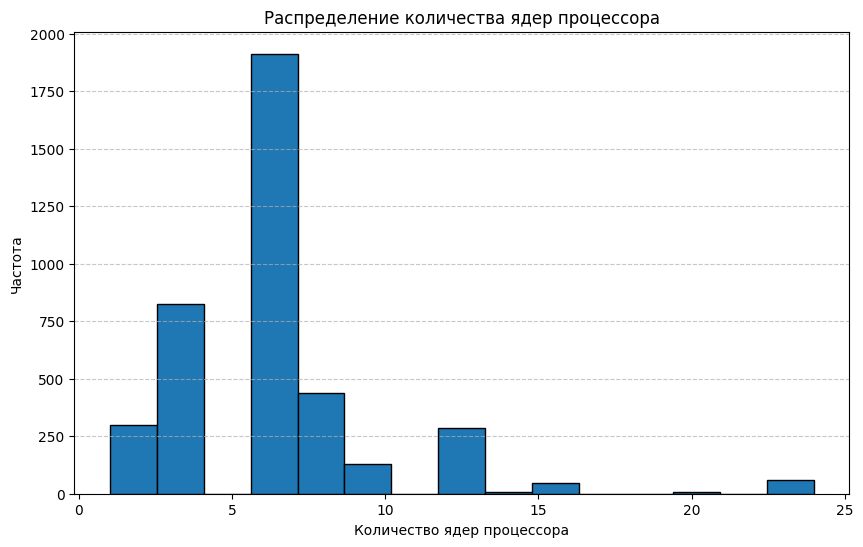

In [ ]:
# Построим гистограмму для переменной "количество_ядер_процессора"
plt.figure(figsize=(10, 6))
plt.hist(data_copy['количество_ядер_процессора'], bins=15, edgecolor='black')
plt.title('Распределение количества ядер процессора')
plt.xlabel('Количество ядер процессора')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Распределение количества ядер процессора:

Гистограмма показывает, что большинство товаров имеют от 4 до 6 ядер. Это стандартное количество для многих современных процессоров в различных сегментах рынка.

Среднее и медиана:

Среднее значение (6.49 ядер) и медиана (6 ядер) находятся близко друг к другу, что указывает на относительно симметричное распределение для большинства значений.

Разброс и выбросы:

Существует разброс в количестве ядер от 1 до 24. Максимальное значение (24 ядра) может относиться к высокопроизводительным процессорам, предназначенным для специализированных задач, таких как серверы или рабочие станции.

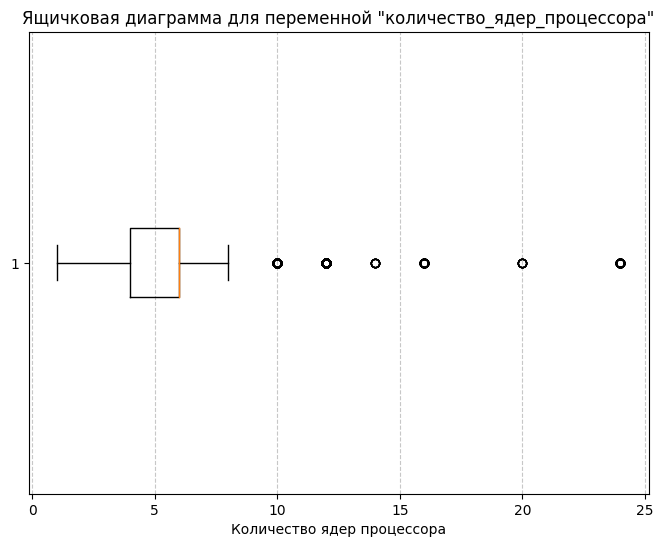

In [ ]:
# Построим ящичковую диаграмму (boxplot) для переменной "количество_ядер_процессора"
plt.figure(figsize=(8, 6))
plt.boxplot(data_copy['количество_ядер_процессора'], vert=False)
plt.title('Ящичковая диаграмма для переменной "количество_ядер_процессора"')
plt.xlabel('Количество ядер процессора')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Большинство значений находятся в диапазоне от 4 до 8 ядер, что соответствует стандартным процессорам для большинства товаров.

Выбросы:

Видны выбросы выше 16 ядер, что указывает на специализированные товары с высокопроизводительными процессорами, такими как серверные или рабочие станции.

Разброс данных:

"Усы" диаграммы показывают, что основной диапазон значений (межквартильный размах) охватывает от 4 до 8 ядер. Значения выше 16 ядер считаются выбросами и могут указывать на более дорогие и мощные процессоры.
Эти выбросы могут относиться к товарам высокого класса или нишевым продуктам, ориентированным на специализированное использование.

In [ ]:
# Определим пороги выбросов на основе интерквартильного диапазона (IQR) для переменной "количество_ядер_процессора"
Q1_cores = data_copy['количество_ядер_процессора'].quantile(0.25)
Q3_cores = data_copy['количество_ядер_процессора'].quantile(0.75)
IQR_cores = Q3_cores - Q1_cores

# Порог для определения верхних выбросов
upper_bound_cores = Q3_cores + 1.5 * IQR_cores

# Извлечем данные с количеством ядер процессора выше этого порога (верхние выбросы)
cores_outliers = data_copy[data_copy['количество_ядер_процессора'] > upper_bound_cores]

cores_outliers

,ид_продукта,название,цена,продажи,отзывы,продавец,рейтинг_продавца,видеопроцессор,операционная_система,гарантийный_срок,страна_производства,процессор_тип,количество_ядер_процессора,тип_оперативной_памяти,объем_оперативной_памяти_(гб),объем_накопителя_hdd,объем_накопителя_ssd
6,19358744,игровой компьютер robotcomp анаконда 2.0 v1,128284.0,5,4,robotcomp,4.7,nvidia geforce rtx 3070,trial,36.0,россия,intel core i5,10,ddr4,16,1000,480
9,19399933,игровой компьютер robotcomp ту 160 v1,93863.0,5,3,robotcomp,4.7,nvidia geforce rtx 3050,trial,36.0,россия,intel core i5,10,ddr4,16,1000,480
10,19684231,игровой компьютер robotcomp ту 160 v3,102703.0,5,2,robotcomp,4.7,nvidia geforce rtx 3050,windows 10,36.0,россия,intel core i5,10,ddr4,16,1000,480
11,19877489,игровой компьютер robotcomp ту 160 v2,98470.0,5,6,robotcomp,4.7,nvidia geforce rtx 3050,windows 10,36.0,россия,intel core i5,10,ddr4,16,1000,480
18,19888985,мощный пк robotcomp анаконда 2.0 v2,135189.0,5,0,robotcomp,4.7,nvidia geforce rtx 3070,windows 10,36.0,россия,intel core i5,10,ddr4,16,1000,480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,152356346,игровой компьютер smasher m1 white,155700.0,0,0,m-bit,0.0,nvidia geforce rtx 4070,windows 11,36.0,россия,intel core i7,12,ddr4,32,1000,480
3957,152356347,игровой компьютер smasher m1 white,155700.0,0,0,m-bit,0.0,nvidia geforce rtx 4070,windows 11,36.0,россия,intel core i7,12,ddr4,32,1000,480
3958,152356348,игровой компьютер smasher m1 white,155700.0,0,0,m-bit,0.0,nvidia geforce rtx 4070,windows 11,36.0,россия,intel core i7,12,ddr4,32,1000,480
3959,152369391,"игровой компьютер ryzen 9 5900x, rtx 3060 ti 8...",124900.0,0,0,king komp,4.1,nvidia geforce rtx 3060,windows 10,12.0,россия,amd ryzen 9,12,ddr4,32,1000,480


Список товаров с высоким количеством ядер процессора:

Все товары с выбросами относятся к категории игровых компьютеров или мощных ПК от продавца robotcomp.
Примеры: "Игровой компьютер robotcomp анаконда 2.0 v1" (10 ядер), "Мощный ПК robotcomp анаконда 2.0 v2" (10 ядер), "Мощный игровой компьютер robotcomp анаконда 3.0" (10 ядер).

Продавец и рейтинги:

Все товары принадлежат одному продавцу — robotcomp с рейтингом 4.7, что говорит о его надежности и популярности.

Цены:

Цены на эти товары варьируются от 86,946 до 165,484 рублей, что является типичным для высокопроизводительных компьютеров с мощными процессорами и видеокартами.

Продажи и отзывы:

Количество продаж для большинства товаров — 5-10, что указывает на определенную популярность таких конфигураций. Количество отзывов также варьируется от 0 до 6, что может говорить о нишевом рынке.

Технические характеристики:

Все товары имеют процессоры с 10 ядрами, тип оперативной памяти DDR4 и объем оперативной памяти от 16 до 32 ГБ.

Выводы:

Эти товары с высоким количеством ядер ориентированы на требовательных пользователей и энтузиастов. Большое количество ядер и мощные видеокарты указывают на их использование для игр, работы с графикой или вычислительных задач.
Продавец robotcomp специализируется на мощных игровых компьютерах, и его товары с большим количеством ядер привлекают покупателей в нишевом сегменте.

In [ ]:
# Выполним тест Шапиро-Уилка на нормальность распределения для переменной "количество_ядер_процессора" среди выбросов
stats.shapiro(data_copy['количество_ядер_процессора'])

ShapiroResult(statistic=0.7405461082905243, pvalue=6.085083273206544e-62)

Значение p значительно меньше 0.05, что указывает на сильное отклонение распределения выбросов переменной количество ядер процессора от нормального распределения. Это подтверждает, что распределение количества ядер среди выбросов не является нормальным и характеризуется значительными выбросами и асимметрией.

Для анализа выбросов переменной количество ядер процессора следует использовать непараметрические методы или провести преобразование данных для более нормального распределения.

Общий вывод по количеству ядер процессора:

Анализ переменной количество ядер процессора показывает, что большинство товаров оснащены процессорами с 4-6 ядрами, что является стандартом для современных процессоров. Однако существуют товары с аномально высоким количеством ядер, что указывает на их специализацию и высокую производительность.

Распределение количества ядер процессора:

Большинство товаров имеют от 4 до 6 ядер, что является типичным для среднего сегмента рынка. Среднее значение (6.49 ядер) близко к медиане (6 ядер), что указывает на симметричное распределение для большинства значений.

Выбросы:

Были выявлены выбросы с количеством ядер выше 16, что относится к мощным компьютерам и серверным системам. Эти товары оснащены высокопроизводительными процессорами с 10 и более ядрами.

Товары с высоким количеством ядер:

Все товары с выбросами относятся к категории игровых компьютеров или мощных ПК от продавца robotcomp с высоким рейтингом (4.7). Цены на такие компьютеры варьируются от 86,946 до 165,484 рублей, что типично для высокопроизводительных систем.

Продажи и отзывы:

Товары с большим количеством ядер имеют умеренные продажи (5-10) и немного отзывов (0-6), что свидетельствует о их нишевом рынке и ориентации на энтузиастов и требовательных пользователей.

Тест Шапиро-Уилка:

Результаты теста Шапиро-Уилка показали, что распределение количества ядер среди выбросов не является нормальным Это подтверждает наличие значительных выбросов и асимметрии.

Для анализа выбросов переменной количество ядер процессора рекомендуется использовать непараметрические методы или преобразование данных для более нормального распределения.

### Объем оперативной памяти

In [ ]:
# Рассчитаем основные статистические показатели для переменной "объем_оперативной_памяти"
ram_stats = data_copy['объем_оперативной_памяти_(гб)'].describe()

ram_stats

,объем_оперативной_памяти_(гб)
count,4010.000000
mean,18.117955
std,18.646742
min,1.000000
25%,16.000000
50%,16.000000
75%,16.000000
max,1000.000000


* Количество наблюдений (count): 4010
* Среднее значение (mean): 18.12 ГБ
* Стандартное отклонение (std): 18.65 ГБ
* Минимальное значение (min): 1 ГБ
* 25-й перцентиль (25%): 16 ГБ
* Медиана (50%): 16 ГБ
* 75-й перцентиль (75%): 16 ГБ
* Максимальное значение (max): 1000 ГБ

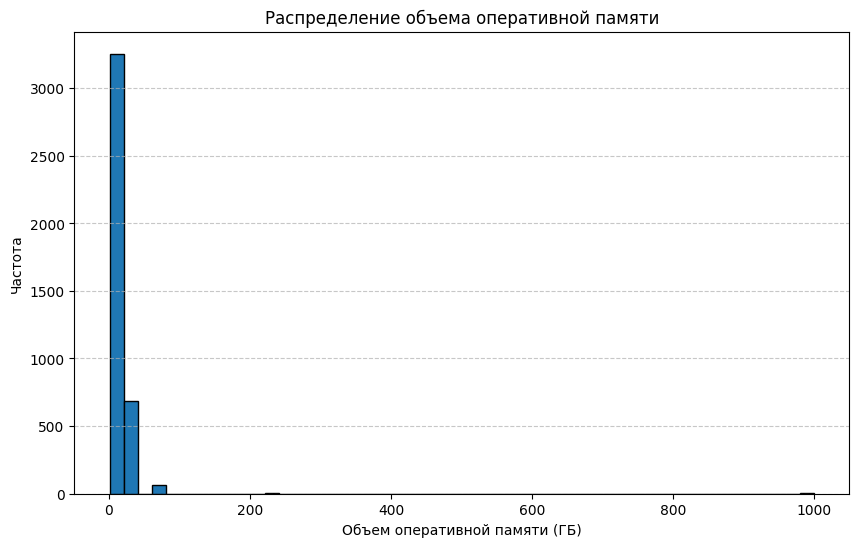

In [ ]:
# Построим гистограмму для переменной "объем_оперативной_памяти_(гб)"
plt.figure(figsize=(10, 6))
plt.hist(data_copy['объем_оперативной_памяти_(гб)'], bins=50, edgecolor='black')
plt.title('Распределение объема оперативной памяти')
plt.xlabel('Объем оперативной памяти (ГБ)')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Основное распределение:

Большинство товаров имеют объем оперативной памяти 16 ГБ, что является стандартным значением для современных компьютеров.

Выбросы:

Наблюдаются значения значительно выше 64 ГБ, включая выброс около 1000 ГБ, что может быть ошибкой в данных или специфическим оборудованием.

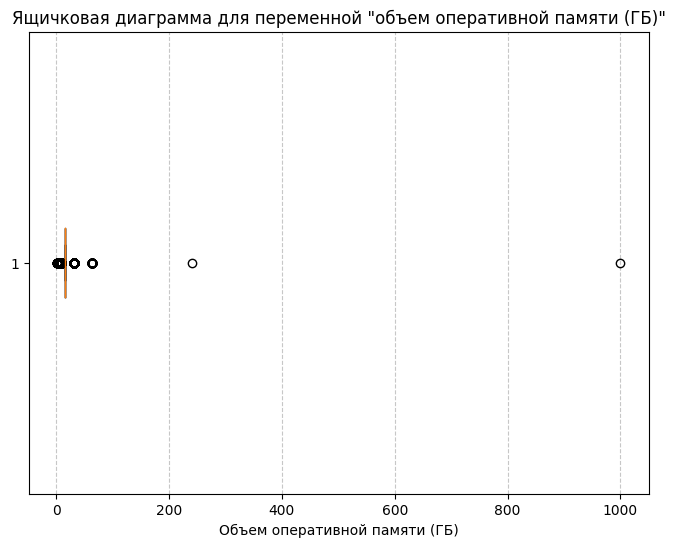

In [ ]:
# Построим ящичковую диаграмму (boxplot) для переменной "объем_оперативной_памяти_(гб)"
plt.figure(figsize=(8, 6))
plt.boxplot(data_copy['объем_оперативной_памяти_(гб)'], vert=False)
plt.title('Ящичковая диаграмма для переменной "объем оперативной памяти (ГБ)"')
plt.xlabel('Объем оперативной памяти (ГБ)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Большинство значений объема оперативной памяти находятся в диапазоне от 8 до 16 ГБ, что соответствует стандартным компьютерам и ноутбукам.

Выбросы:

Видны выбросы выше 32 ГБ, что указывает на специализированные товары с большими объемами оперативной памяти, такими как серверы или рабочие станции. Один явный выброс около 1000 ГБ может быть ошибкой в данных.

Разброс данных:

"Усы" диаграммы показывают, что основной диапазон значений (межквартильный размах) находится от 8 до 16 ГБ. Значения выше 32 ГБ считаются выбросами и могут указывать на товары высокого класса.
Эти выбросы могут относиться к товарам, предназначенным для специализированных задач или высокопроизводительных систем.

In [ ]:
# Определим пороги выбросов на основе интерквартильного диапазона (IQR) для переменной "объем_оперативной_памяти_(гб)"
Q1_ram = data_copy['объем_оперативной_памяти_(гб)'].quantile(0.25)
Q3_ram = data_copy['объем_оперативной_памяти_(гб)'].quantile(0.75)
IQR_ram = Q3_ram - Q1_ram

# Порог для определения верхних выбросов
upper_bound_ram = Q3_ram + 1.5 * IQR_ram

# Извлечем данные с объемом оперативной памяти выше этого порога (верхние выбросы)
ram_outliers = data_copy[data_copy['объем_оперативной_памяти_(гб)'] > upper_bound_ram]

ram_outliers

,ид_продукта,название,цена,продажи,отзывы,продавец,рейтинг_продавца,видеопроцессор,операционная_система,гарантийный_срок,страна_производства,процессор_тип,количество_ядер_процессора,тип_оперативной_памяти,объем_оперативной_памяти_(гб),объем_накопителя_hdd,объем_накопителя_ssd
26,21001520,игровой компьютер robotcomp аллигатор 3.0 v1,40694.0,200,54,robotcomp,4.7,amd radeon amd radeon vega,trial,36.0,россия,amd ryzen 5,6,ddr4,32,1000,512
27,21002727,игровой компьютер robotcomp аллигатор 3.0 v2,40971.0,100,42,robotcomp,4.7,amd radeon amd radeon vega,windows 10,36.0,россия,amd ryzen 5,6,ddr4,32,1000,512
28,21011648,игровой компьютер robotcomp аллигатор 3.0 v3,47827.0,200,84,robotcomp,4.7,amd radeon amd radeon vega,windows 10,36.0,россия,amd ryzen 5,6,ddr4,32,1000,512
29,21127144,мощный игровой компьютер robotcomp анаконда 3....,153861.0,10,4,robotcomp,4.7,nvidia geforce rtx 3080,trial,36.0,россия,intel core i5,10,ddr4,32,1000,480
30,21128147,мощный игровой компьютер robotcomp анаконда 3....,160066.0,5,0,robotcomp,4.7,nvidia geforce rtx 3080,windows 10,36.0,россия,intel core i5,10,ddr4,32,1000,480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,152355417,игровой компьютер smasher m1,155700.0,0,0,m-bit,0.0,nvidia geforce rtx 4070,windows 11,36.0,россия,intel core i7,12,ddr4,32,1000,480
3956,152356346,игровой компьютер smasher m1 white,155700.0,0,0,m-bit,0.0,nvidia geforce rtx 4070,windows 11,36.0,россия,intel core i7,12,ddr4,32,1000,480
3957,152356347,игровой компьютер smasher m1 white,155700.0,0,0,m-bit,0.0,nvidia geforce rtx 4070,windows 11,36.0,россия,intel core i7,12,ddr4,32,1000,480
3958,152356348,игровой компьютер smasher m1 white,155700.0,0,0,m-bit,0.0,nvidia geforce rtx 4070,windows 11,36.0,россия,intel core i7,12,ddr4,32,1000,480


Список товаров с высоким объемом оперативной памяти:

Товары, такие как игровые компьютеры и мощные ПК от продавца robotcomp, имеют 32 ГБ оперативной памяти.
Примеры: "Игровой компьютер robotcomp аллигатор 3.0 v1", "Игровой компьютер robotcomp анаконда 3.0 v3", "Мощный игровой компьютер robotcomp анаконда 3.0".

Продавец и рейтинги:

Все товары принадлежат одному продавцу — robotcomp с высоким рейтингом 4.7, что говорит о его надежности и популярности.
Цены:

Цены на эти товары варьируются от 40,694 до 165,484 рублей, что типично для мощных компьютеров с большим объемом оперативной памяти и высокопроизводительными процессорами.

Продажи и отзывы:

У товаров есть умеренные продажи (от 5 до 200) и отзывы (от 0 до 84), что свидетельствует о спросе на такие конфигурации среди требовательных пользователей.

Технические характеристики:

Все товары имеют 32 ГБ оперативной памяти типа DDR4, что является хорошим объемом для игровых компьютеров и систем, ориентированных на выполнение ресурсоемких задач.

Выводы:

Эти товары с большим объемом оперативной памяти ориентированы на энтузиастов, требовательных пользователей и тех, кто ищет высокую производительность. Продавец robotcomp предлагает разнообразные варианты конфигураций для игровых ПК и рабочих станций.

In [ ]:
# Выполним тест Шапиро-Уилка на нормальность распределения для переменной "количество_ядер_процессора" среди выбросов
stats.shapiro(data_copy['объем_оперативной_памяти_(гб)'])

ShapiroResult(statistic=0.24830625634553893, pvalue=1.282089243043282e-83)

Значение p значительно меньше 0.05, что указывает на сильное отклонение распределения выбросов переменной объем оперативной памяти (ГБ) от нормального распределения. Это подтверждает, что распределение объемов оперативной памяти среди выбросов не является нормальным и характеризуется значительными выбросами и асимметрией.

Вывод:

Для анализа выбросов переменной объем оперативной памяти (ГБ) следует использовать непараметрические методы или провести преобразование данных для более нормального распределения.









Вывод по объему оперативной памяти:

Анализ переменной объем оперативной памяти (ГБ) показывает, что большинство товаров имеют стандартный объем оперативной памяти 16 ГБ, что соответствует современным компьютерам и ноутбукам. Однако наблюдаются товары с аномально высоким объемом памяти, что указывает на их специализированное использование.

Распределение объема оперативной памяти:

Большинство товаров имеют объем оперативной памяти от 8 до 16 ГБ, что является стандартом для многих современных систем. Среднее значение (18.12 ГБ) чуть выше медианы (16 ГБ), что указывает на наличие товаров с большим объемом оперативной памяти.

Выбросы:

Обнаружены выбросы выше 32 ГБ, что указывает на товары с большим объемом оперативной памяти (например, 32 ГБ), предназначенные для высокопроизводительных систем, серверов или игровых компьютеров. Один явный выброс около 1000 ГБ может быть ошибкой данных.

Товары с высоким объемом оперативной памяти:

Все товары с выбросами относятся к категории игровых компьютеров или мощных ПК от продавца robotcomp с высоким рейтингом (4.7). Цены на такие компьютеры варьируются от 40,694 до 165,484 рублей, что типично для высокопроизводительных систем.

Продажи и отзывы:

Товары с большим объемом оперативной памяти имеют умеренные продажи (5-200) и количество отзывов (0-84), что говорит о спросе среди требовательных пользователей.

Тест Шапиро-Уилка:

Результаты теста Шапиро-Уилка показали, что распределение объемов оперативной памяти среди выбросов не является нормальным. Это подтверждает наличие значительных выбросов и асимметрии.

Рекомендации:

Для анализа выбросов переменной объем оперативной памяти (ГБ) рекомендуется использовать непараметрические методы или преобразование данных для более нормального распределения.

### Объем накопителя HDD

In [ ]:
# Рассчитаем основные статистические показатели для переменной "объем_накопителя_hdd"
hdd_stats = data_copy['объем_накопителя_hdd'].describe()

hdd_stats

,объем_накопителя_hdd
count,4010.000000
mean,984.531671
std,169.828974
min,0.000000
25%,1000.000000
50%,1000.000000
75%,1000.000000
max,4000.000000


* Среднее значение: 984.53 ГБ
* Медиана (50-й перцентиль): 1000 ГБ
* Стандартное отклонение: 169.83 ГБ
* Минимум: 0 ГБ
* Максимум: 4000 ГБ
* Дисперсия: 28841.88

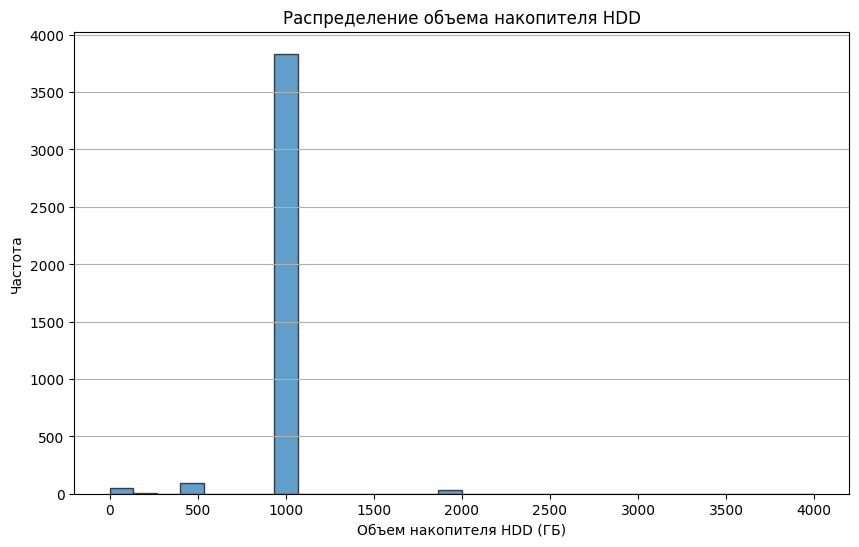

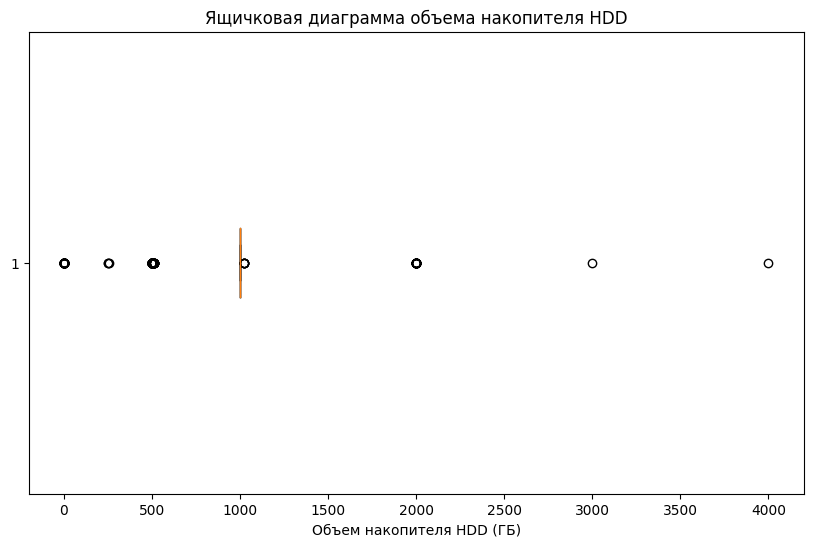

In [ ]:
# Построение гистограммы для переменной объем_накопителя_hdd
plt.figure(figsize=(10, 6))
plt.hist(data_copy['объем_накопителя_hdd'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Распределение объема накопителя HDD')
plt.xlabel('Объем накопителя HDD (ГБ)')
plt.ylabel('Частота')
plt.grid(axis='y')

# Отображение гистограммы
plt.show()

# Построение ящичковой диаграммы для переменной объем_накопителя_hdd
plt.figure(figsize=(10, 6))
plt.boxplot(data_copy['объем_накопителя_hdd'], vert=False)
plt.title('Ящичковая диаграмма объема накопителя HDD')
plt.xlabel('Объем накопителя HDD (ГБ)')

# Отображение ящичковой диаграммы
plt.show()

Гистограмма и ящичковая диаграмма показали следующее распределение объема накопителя HDD:

Большинство значений сосредоточено около 1000 ГБ, что подтверждается медианой и 75-м перцентилем.
Есть несколько выбросов с объемом до 4000 ГБ, а также присутствуют значения 0 ГБ, что может быть либо ошибкой данных, либо отсутствием HDD.

In [ ]:
# Определение выбросов для переменной объем_накопителя_hdd с использованием метода межквартильного размаха (IQR)
Q1 = data_copy['объем_накопителя_hdd'].quantile(0.25)
Q3 = data_copy['объем_накопителя_hdd'].quantile(0.75)
IQR = Q3 - Q1

# Границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Выбор данных, которые являются выбросами
outliers = data_copy[(data_copy['объем_накопителя_hdd'] < lower_bound) | (data_copy['объем_накопителя_hdd'] > upper_bound)]

outliers

,ид_продукта,название,цена,продажи,отзывы,продавец,рейтинг_продавца,видеопроцессор,операционная_система,гарантийный_срок,страна_производства,процессор_тип,количество_ядер_процессора,тип_оперативной_памяти,объем_оперативной_памяти_(гб),объем_накопителя_hdd,объем_накопителя_ssd
51,22930599,игровой компьютер robotcomp калибр v2,114308.0,5,2,robotcomp,4.7,nvidia geforce rtx 3060,windows 10,36.0,россия,intel core i7,12,ddr4,32,2000,512
52,22931659,игровой компьютер robotcomp калибр v3,122457.0,80,17,robotcomp,4.7,nvidia geforce rtx 3060,windows 10,36.0,россия,intel core i7,12,ddr4,32,2000,512
93,40720609,игровой компьютер roo24 i7 hellcat,104840.0,10,4,roo24.ru,4.7,nvidia geforce rtx 3060,windows 10,36.0,россия,intel core i7,8,ddr4,16,2000,480
154,49109460,игровой системный блок в сборе с rx 580 на 8gb,36539.0,20,22,terabyte,4.2,amd radeon amd radeon rx 580,windows 10,24.0,россия,intel xeon,6,ddr3,16,0,256
161,50511017,игровой компьютер raskat strike 720,171594.0,0,0,robotcomp,4.7,nvidia geforce rtx 3080,нет ос,36.0,россия,intel core i7,8,ddr4,16,2000,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,151823800,"игровой компьютер kk intel core i7 11700kf, rt...",102900.0,0,0,king komp,4.1,nvidia geforce rtx 3060,windows 10,12.0,россия,intel core i7,8,ddr4,32,2000,500
3745,151903031,"игровой компьютер intel core i5 10400f, gtx 16...",49900.0,0,0,king komp,4.1,nvidia geforce gtx 1660,windows 10,12.0,россия,intel core i5,6,ddr4,16,2000,120
3911,152260390,"игровой компьютер kk i3 9100f, gtx 970 4gb, dd...",39900.0,0,0,king komp,4.1,nvidia geforce gtx 970,windows 10,12.0,россия,intel core i3,4,ddr4,16,500,120
3986,152688496,"компьютер /8gb/ssd-128/hdd-500/монитор 22""",48000.0,0,0,компьютерс,4.5,nvidia geforce gtx 650,windows 11,12.0,россия,intel xeon,8,ddr4,8,500,128


Выбросы для переменной "объем_накопителя_HDD" включают компьютеры с объемом HDD, значительно отличающимся от большинства других значений:

Некоторые компьютеры имеют объем HDD 2000 ГБ, что выше верхней границы выбросов.
Есть также значения с объемом HDD равным 0, что может быть ошибкой данных или указывать на отсутствие HDD.

In [ ]:
# Выполнение теста Шапиро-Уилка на нормальность распределения для переменной объем_накопителя_hdd
stats.shapiro(data_copy['объем_накопителя_hdd'])

ShapiroResult(statistic=0.22408613846148717, pvalue=2.5741725884475927e-84)

Поскольку P-значение значительно меньше 0.05, мы отвергаем нулевую гипотезу о нормальности распределения переменной "объем_накопителя_HDD". Это означает, что распределение объема HDD в данных существенно отклоняется от нормального.

Данные имеют ненормальное распределение, и это следует учитывать при выборе методов анализа и статистических тестов, так как некоторые из них предполагают нормальность данных.

Анализ показал, что переменная "объем_накопителя_HDD" имеет ненормальное распределение с несколькими выбросами. Большинство значений сосредоточено около 1000 ГБ, но встречаются значения до 4000 ГБ и 0 ГБ, которые считаются выбросами. Тест Шапиро-Уилка подтвердил ненормальность распределения (P-значение < 0.05). Это важно учитывать при выборе статистических методов анализа, поскольку многие из них требуют нормальности данных.

### Объем накопителя SSD

In [ ]:
# Расчет основных статистических показателей для переменной объем_накопителя_ssd
ssd_stats = data_copy['объем_накопителя_ssd'].describe()

ssd_stats

,объем_накопителя_ssd
count,4010.000000
mean,462.892768
std,99.858353
min,16.000000
25%,480.000000
50%,480.000000
75%,480.000000
max,2000.000000


* Среднее значение: 462.89 ГБ
* Медиана (50-й перцентиль): 480 ГБ
* Стандартное отклонение: 99.86 ГБ
* Минимум: 16 ГБ
* Максимум: 2000 ГБ
* Дисперсия: 9971.69

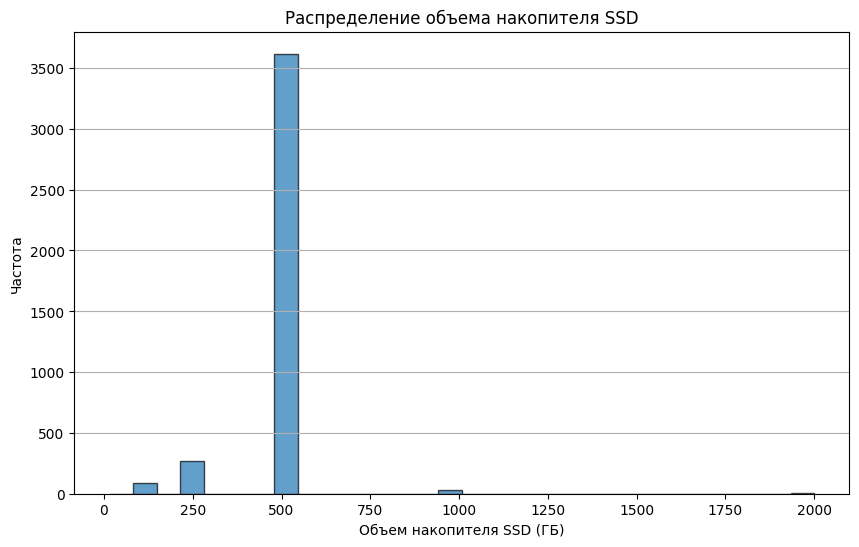

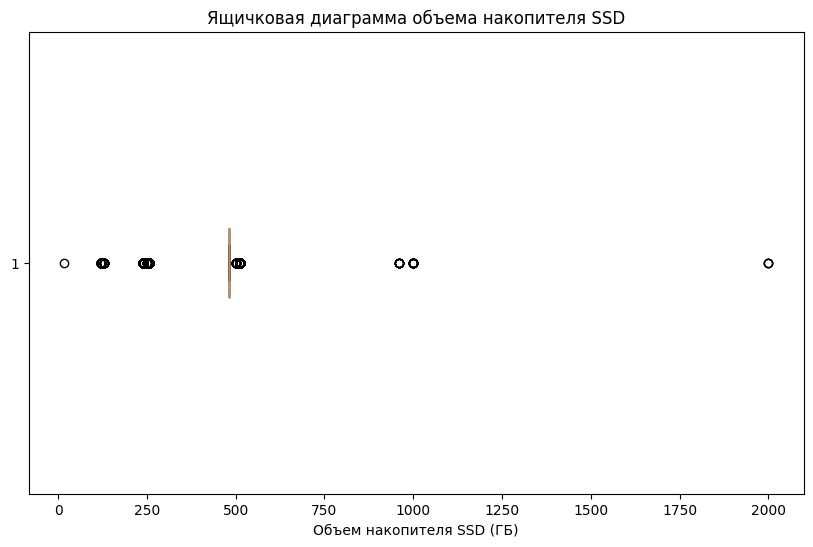

In [ ]:
# Построение гистограммы для переменной объем_накопителя_ssd
plt.figure(figsize=(10, 6))
plt.hist(data_copy['объем_накопителя_ssd'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Распределение объема накопителя SSD')
plt.xlabel('Объем накопителя SSD (ГБ)')
plt.ylabel('Частота')
plt.grid(axis='y')

# Отображение гистограммы
plt.show()

# Построение ящичковой диаграммы для переменной объем_накопителя_ssd
plt.figure(figsize=(10, 6))
plt.boxplot(data_copy['объем_накопителя_ssd'], vert=False)
plt.title('Ящичковая диаграмма объема накопителя SSD')
plt.xlabel('Объем накопителя SSD (ГБ)')

# Отображение ящичковой диаграммы
plt.show()

Гистограмма и ящичковая диаграмма для переменной "объем_накопителя_SSD" показали следующее:

Большинство значений сосредоточено около 480 ГБ, что подтверждается медианой и 75-м перцентилем.
Есть несколько выбросов с объемом до 2000 ГБ, что является аномальными значениями относительно большинства данных.

In [ ]:
# Определение выбросов для переменной объем_накопителя_ssd с использованием метода межквартильного размаха (IQR)
Q1_ssd = data_copy['объем_накопителя_ssd'].quantile(0.25)
Q3_ssd = data_copy['объем_накопителя_ssd'].quantile(0.75)
IQR_ssd = Q3_ssd - Q1_ssd

# Границы выбросов
lower_bound_ssd = Q1_ssd - 1.5 * IQR_ssd
upper_bound_ssd = Q3_ssd + 1.5 * IQR_ssd

# Выбор данных, которые являются выбросами для SSD
outliers_ssd = data_copy[(data_copy['объем_накопителя_ssd'] < lower_bound_ssd) | (data_copy['объем_накопителя_ssd'] > upper_bound_ssd)]

outliers_ssd

,ид_продукта,название,цена,продажи,отзывы,продавец,рейтинг_продавца,видеопроцессор,операционная_система,гарантийный_срок,страна_производства,процессор_тип,количество_ядер_процессора,тип_оперативной_памяти,объем_оперативной_памяти_(гб),объем_накопителя_hdd,объем_накопителя_ssd
26,21001520,игровой компьютер robotcomp аллигатор 3.0 v1,40694.0,200,54,robotcomp,4.7,amd radeon amd radeon vega,trial,36.0,россия,amd ryzen 5,6,ddr4,32,1000,512
27,21002727,игровой компьютер robotcomp аллигатор 3.0 v2,40971.0,100,42,robotcomp,4.7,amd radeon amd radeon vega,windows 10,36.0,россия,amd ryzen 5,6,ddr4,32,1000,512
28,21011648,игровой компьютер robotcomp аллигатор 3.0 v3,47827.0,200,84,robotcomp,4.7,amd radeon amd radeon vega,windows 10,36.0,россия,amd ryzen 5,6,ddr4,32,1000,512
44,21477918,компьютер robotcomp проектировщик v1,76942.0,10,4,robotcomp,4.7,nvidia geforce gt 1030,trial,36.0,россия,intel core i7,12,ddr4,16,1000,512
45,21479215,компьютер robotcomp проектировщик v2,83886.0,5,1,robotcomp,4.7,nvidia geforce gt 1030,windows 10,36.0,россия,intel core i7,12,ddr4,16,1000,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4005,152971271,игровой пк,70000.0,0,0,personal pc,0.0,nvidia,windows 10,12.0,россия,intel core i5,6,ddr4,16,1000,500
4006,152978335,игровой пк,70000.0,0,0,personal pc,0.0,nvidia,windows 10,12.0,россия,intel core i5,6,ddr4,16,1000,500
4007,152979371,игровой пк,70000.0,0,0,personal pc,0.0,nvidia,windows 10,12.0,россия,intel core i5,6,ddr4,16,1000,500
4008,152979918,игровой пк,70000.0,0,0,personal pc,0.0,nvidia,windows 10,12.0,россия,intel core i5,6,ddr4,16,1000,500


Выбросы для переменной "объем_накопителя_SSD" включают компьютеры с объемом SSD, значительно отличающимся от большинства других значений:

Основные выбросы имеют объем SSD 512 ГБ и выше, что является выше верхней границы выбросов.
Это указывает на то, что такие значения могут быть редкими или эксклюзивными конфигурациями для компьютеров.
Таким образом, распределение объемов SSD также имеет выбросы и отклоняется от нормального.

In [ ]:
# Выполнение теста Шапиро-Уилка на нормальность распределения для переменной объем_накопителя_ssd
stats.shapiro(data_copy['объем_накопителя_ssd'])

ShapiroResult(statistic=0.37784915456760093, pvalue=1.6045877503183605e-79)

P-значение значительно меньше 0.05, что указывает на отклонение распределения объема SSD от нормального. Это подтверждает, что распределение переменной "объем_накопителя_SSD" не является нормальным. Такое распределение и наличие выбросов следует учитывать при дальнейшем анализе и выборе статистических методов.

Анализ переменной "объем_накопителя_SSD" показал, что данные имеют ненормальное распределение с выбросами. Большинство значений сосредоточено около 480 ГБ, но присутствуют выбросы с объемом SSD 512 ГБ и выше, вплоть до 2000 ГБ. Эти выбросы связаны с редкими или мощными конфигурациями компьютеров. Тест Шапиро-Уилка подтвердил ненормальность распределения (P-значение < 0.05). Это следует учитывать при выборе методов статистического анализа, так как они могут требовать нормальности данных.

## 4.2 Категориальные переменные

### Название

In [ ]:
# Частота уникальных значений
value_counts = data_copy['название'].value_counts()

# Количество уникальных значений
unique_count = data_copy['название'].nunique()

# Наиболее часто встречающиеся названия (топ-10)
top_names = value_counts.head(10)

# Подготовка таблицы для отображения
top_names_df = top_names.reset_index().rename(columns={'index': 'Название', 'название': 'Частота'})

# Отображение результатов
top_names_df, unique_count

(                                             Частота  count
 0             компьютер, системный блок, пк intel i5     33
 1         компьютер rgb, системный блок, пк intel i7     33
 2             компьютер, системный блок, пк intel i7     33
 3         компьютер rgb, системный блок, пк intel i5     33
 4         компьютер rgb, системный блок, пк intel i3     33
 5             компьютер, системный блок, пк intel i3     33
 6             игровой компьютер roo24 gaming s4 plus     30
 7  игровой компьютер 24 ядра gtx1060 intel пк, си...     24
 8                                          компьютер     18
 9  игровой компьютер best family midi intel core ...     12,
 2007)

Количество уникальных значений: 2007.

Топ-10 наиболее часто встречающихся названий представлены в таблице выше с их частотой появления.

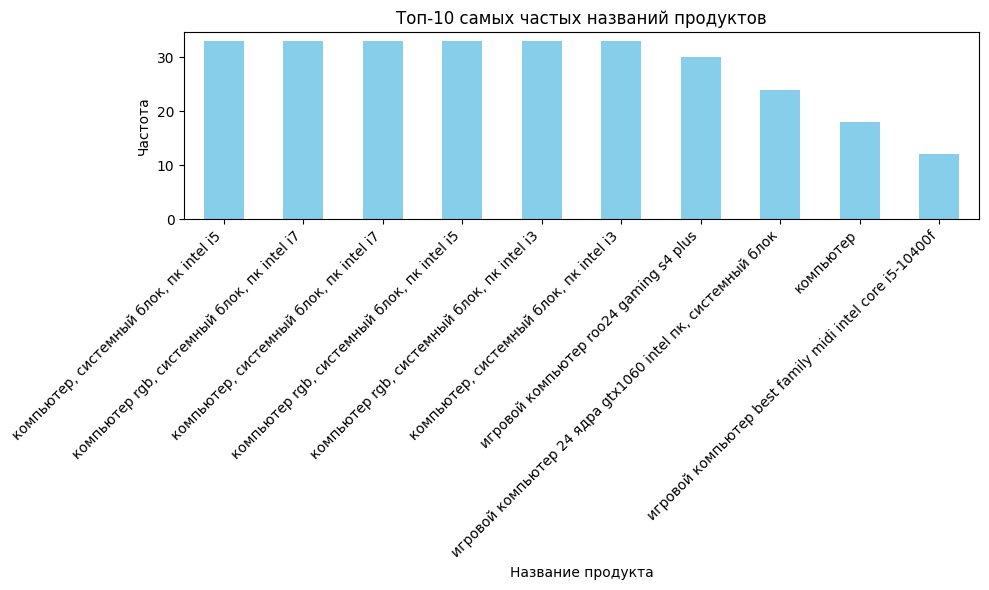

In [ ]:
# Визуализация частоты топ-10 названий
plt.figure(figsize=(10, 6))
top_names.plot(kind='bar', color='skyblue')
plt.title('Топ-10 самых частых названий продуктов')
plt.xlabel('Название продукта')
plt.ylabel('Частота')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Показываем график
plt.show()

Вывод по анализу категориальной переменной "название":

Количество уникальных значений: В переменной "название" представлено 2007 уникальных значений. Это говорит о большом разнообразии наименований продуктов в данных.

Наиболее частые названия: Топ-10 наиболее часто встречающихся названий продуктов имеют одинаковую частоту появления (от 12 до 33 раз). Среди них можно выделить:

Компьютеры и системные блоки на базе процессоров Intel (i5, i7, i3) как наиболее часто встречающиеся.
Присутствие названий, включающих термины "игровой компьютер", что указывает на популярность определенных конфигураций или сегмента продукции.

Распределение названий:

Большинство наименований продуктов уникальны или встречаются редко. Наиболее популярные названия встречаются не более 33 раз. Это может указывать на разнообразие ассортимента или различие в подходах к наименованию продуктов.

Визуализация:

График частоты появления топ-10 названий показывает, что некоторые названия очень близки по частоте, что может свидетельствовать о схожести продуктов или маркетинговых стратегий при их описании.

### Продавец

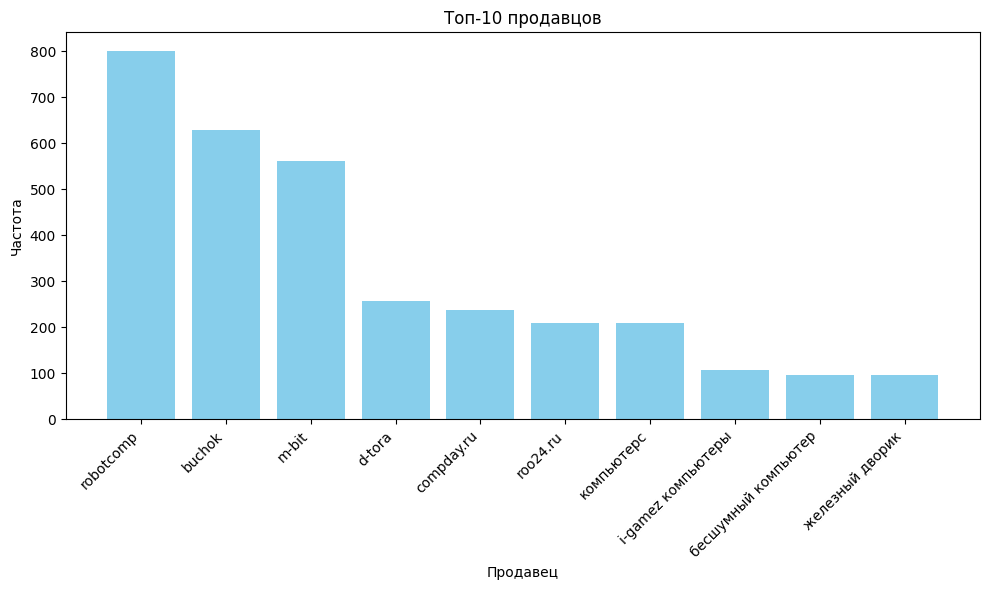

,Частота,count
0,robotcomp,801
1,buchok,629
2,m-bit,562
3,d-tora,258
4,compday.ru,237
5,roo24.ru,209
6,компьютерс,209
7,i-gamez компьютеры,107
8,бесшумный компьютер,96
9,железный дворик,96


In [ ]:
# Частота значений для переменной "продавец"
seller_value_counts = data_copy['продавец'].value_counts().head(10)

# Визуализация топ-10 продавцов
plt.figure(figsize=(10, 6))
plt.bar(seller_value_counts.index, seller_value_counts.values, color='skyblue')
plt.title('Топ-10 продавцов')
plt.xlabel('Продавец')
plt.ylabel('Частота')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Показать график
plt.show()

# Таблица с топ-10 продавцов
seller_value_counts.reset_index().rename(columns={'index': 'Продавец', 'продавец': 'Частота'})

Топ-10 продавцов по частоте приведены в таблице выше.
На графике представлено распределение наиболее популярных продавцов, таких как "robotcomp", "buchok", "m-bit" и другие.

### Видеопроцессор

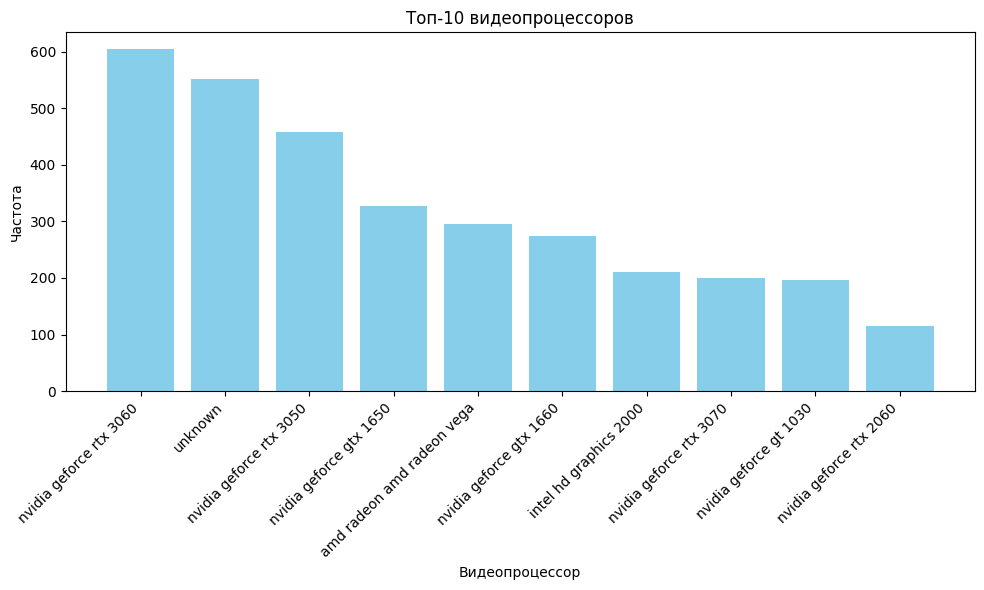

,Частота,count
0,nvidia geforce rtx 3060,604
1,unknown,551
2,nvidia geforce rtx 3050,458
3,nvidia geforce gtx 1650,327
4,amd radeon amd radeon vega,295
5,nvidia geforce gtx 1660,275
6,intel hd graphics 2000,211
7,nvidia geforce rtx 3070,200
8,nvidia geforce gt 1030,197
9,nvidia geforce rtx 2060,115


In [ ]:
# Частота значений для переменной "видеопроцессор"
gpu_value_counts = data_copy['видеопроцессор'].value_counts().head(10)

# Визуализация топ-10 видеопроцессоров
plt.figure(figsize=(10, 6))
plt.bar(gpu_value_counts.index, gpu_value_counts.values, color='skyblue')
plt.title('Топ-10 видеопроцессоров')
plt.xlabel('Видеопроцессор')
plt.ylabel('Частота')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Показать график
plt.show()

# Таблица с топ-10 видеопроцессоров
gpu_value_counts.reset_index().rename(columns={'index': 'Видеопроцессор', 'видеопроцессор': 'Частота'})

Топ-10 видеопроцессоров по частоте представлены в таблице выше.

На графике показано распределение наиболее популярных видеопроцессоров, таких как "nvidia geforce rtx 3060", "nvidia geforce rtx 3050", "amd radeon amd radeon vega", и другие

### Операционная система

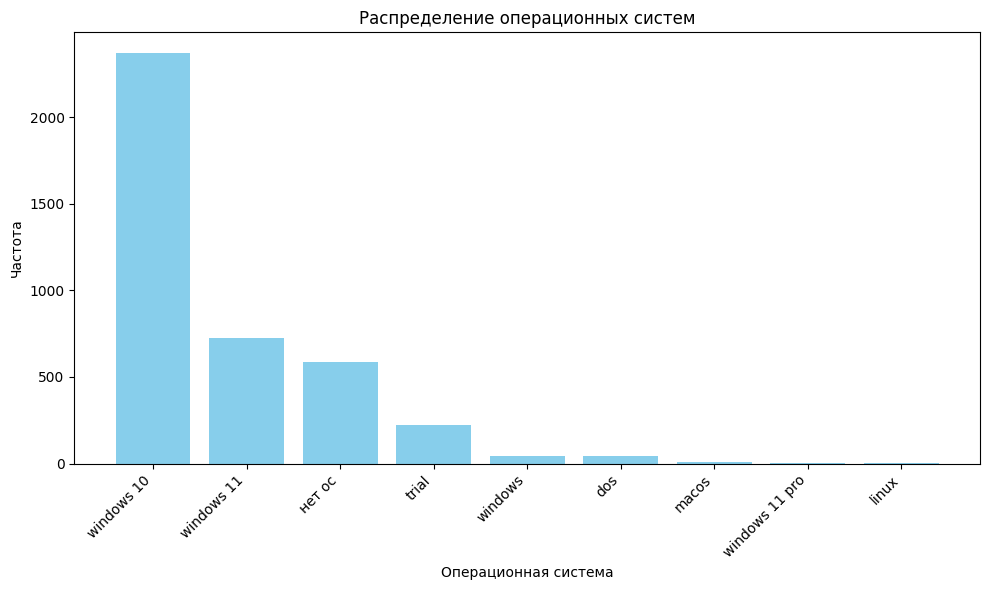

,Частота,count
0,windows 10,2371
1,windows 11,727
2,нет ос,588
3,trial,225
4,windows,45
5,dos,45
6,macos,7
7,windows 11 pro,1
8,linux,1


In [ ]:
# Частота значений для переменной "операционная_система"
os_value_counts = data_copy['операционная_система'].value_counts().head(10)

# Визуализация распределения операционных систем
plt.figure(figsize=(10, 6))
plt.bar(os_value_counts.index, os_value_counts.values, color='skyblue')
plt.title('Распределение операционных систем')
plt.xlabel('Операционная система')
plt.ylabel('Частота')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Показать график
plt.show()

# Таблица с распределением операционных систем
os_value_counts.reset_index().rename(columns={'index': 'Операционная система', 'операционная_система': 'Частота'})

Топ-операционные системы по частоте представлены в таблице выше.
На графике показано распределение наиболее часто встречающихся операционных систем, таких как "Windows 10", "Windows 11", и "нет ОС".

### Страна производства

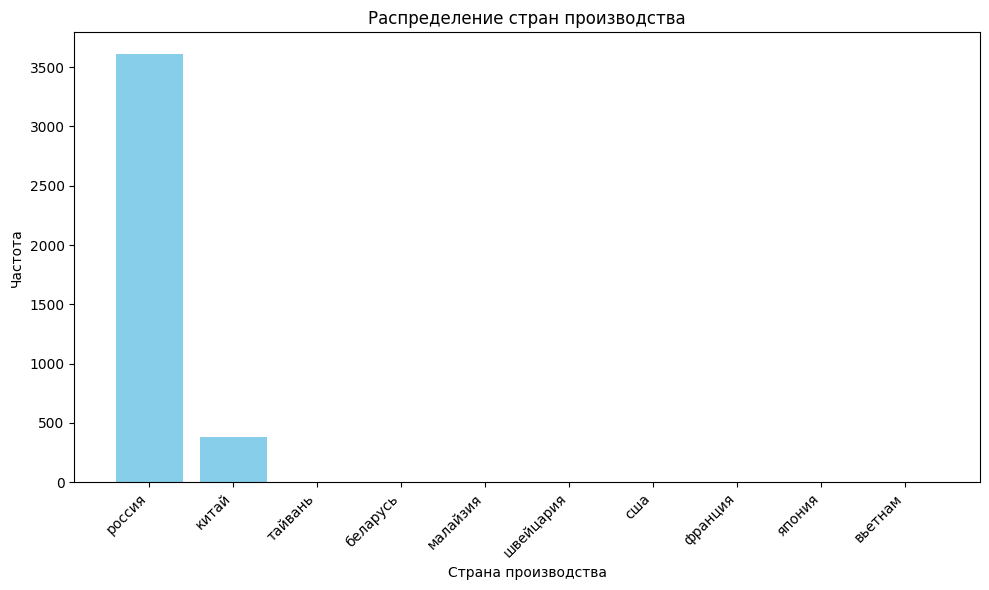

,Частота,count
0,россия,3613
1,китай,379
2,тайвань,5
3,беларусь,5
4,малайзия,2
5,швейцария,2
6,сша,1
7,франция,1
8,япония,1
9,вьетнам,1


In [ ]:
# Частота значений для переменной "страна_производства"
country_value_counts = data_copy['страна_производства'].value_counts().head(10)

# Визуализация распределения стран производства
plt.figure(figsize=(10, 6))
plt.bar(country_value_counts.index, country_value_counts.values, color='skyblue')
plt.title('Распределение стран производства')
plt.xlabel('Страна производства')
plt.ylabel('Частота')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Показать график
plt.show()

# Таблица с распределением стран производства
country_value_counts.reset_index().rename(columns={'index': 'Страна производства', 'страна_производства': 'Частота'})

Топ-страны производства по частоте представлены в таблице выше.
На графике видно, что подавляющее большинство продукции производится в "России" и "Китае", а другие страны представлены гораздо реже.

### Тип процессора

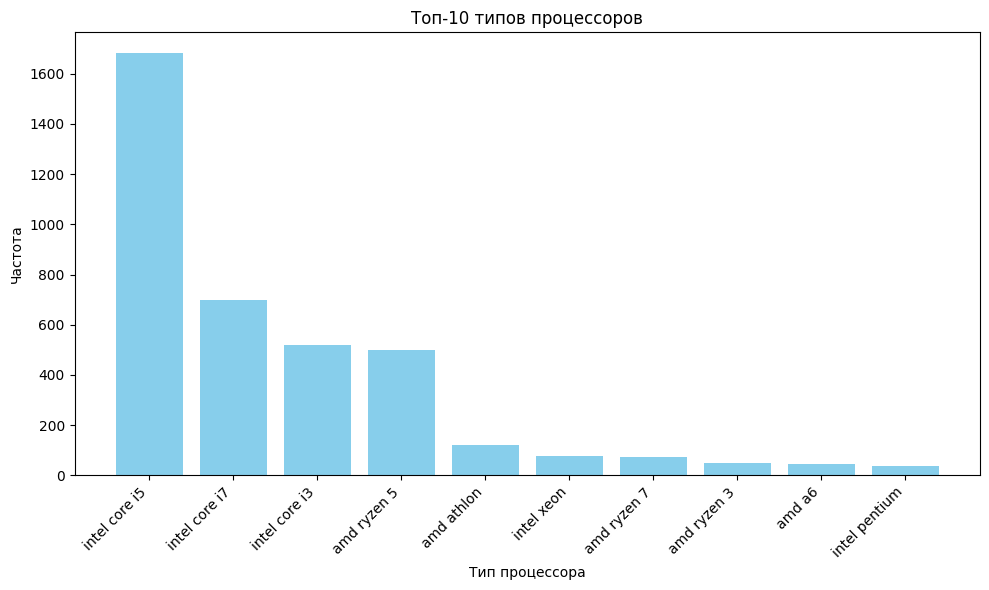

,Частота,count
0,intel core i5,1681
1,intel core i7,699
2,intel core i3,521
3,amd ryzen 5,498
4,amd athlon,121
5,intel xeon,78
6,amd ryzen 7,72
7,amd ryzen 3,51
8,amd a6,47
9,intel pentium,39


In [ ]:
# Частота значений для переменной "процессор_тип"
cpu_value_counts = data_copy['процессор_тип'].value_counts().head(10)

# Визуализация топ-10 типов процессоров
plt.figure(figsize=(10, 6))
plt.bar(cpu_value_counts.index, cpu_value_counts.values, color='skyblue')
plt.title('Топ-10 типов процессоров')
plt.xlabel('Тип процессора')
plt.ylabel('Частота')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Показать график
plt.show()

# Таблица с топ-10 типов процессоров
cpu_value_counts.reset_index().rename(columns={'index': 'Тип процессора', 'процессор_тип': 'Частота'})

Топ-10 типов процессоров по частоте представлены в таблице выше.
На графике видно, что процессоры "Intel Core i5" доминируют на рынке, за ними следуют "Intel Core i7" и "Intel Core i3". Процессоры AMD также занимают значительную долю, особенно "AMD Ryzen 5".

### Тип оперативной памяти

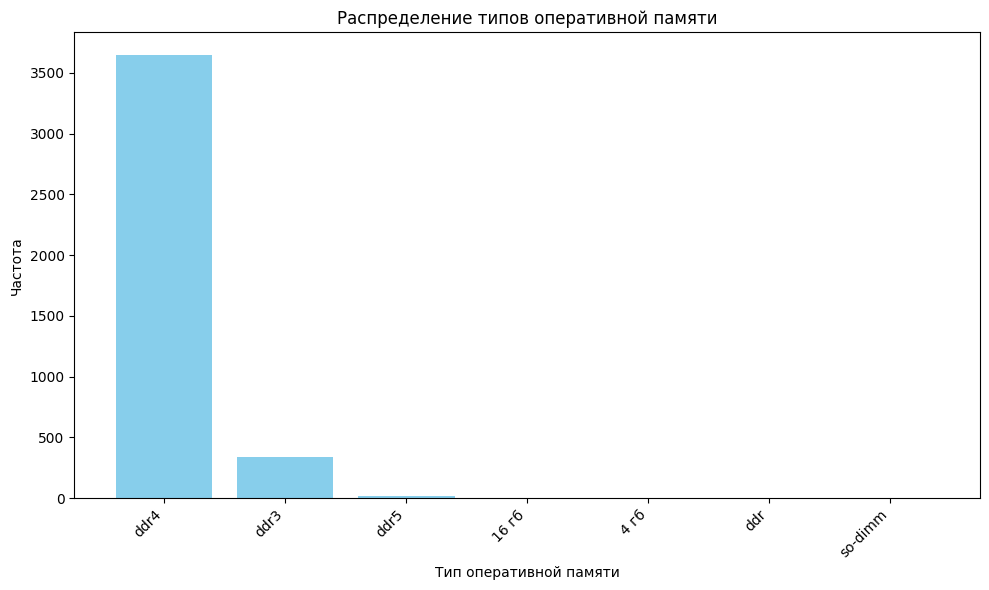

,Частота,count
0,ddr4,3652
1,ddr3,335
2,ddr5,14
3,16 гб,4
4,4 гб,3
5,ddr,1
6,so-dimm,1


In [ ]:
# Частота значений для переменной "тип_оперативной_памяти"
ram_type_value_counts = data_copy['тип_оперативной_памяти'].value_counts().head(10)

# Визуализация распределения типов оперативной памяти
plt.figure(figsize=(10, 6))
plt.bar(ram_type_value_counts.index, ram_type_value_counts.values, color='skyblue')
plt.title('Распределение типов оперативной памяти')
plt.xlabel('Тип оперативной памяти')
plt.ylabel('Частота')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Показать график
plt.show()

# Таблица с распределением типов оперативной памяти
ram_type_value_counts.reset_index().rename(columns={'index': 'Тип оперативной памяти', 'тип_оперативной_памяти': 'Частота'})

Распределение типов оперативной памяти показано в таблице и на графике.
Наиболее популярным типом оперативной памяти является DDR4 (3652 раза), за ним следуют DDR3 (335 раз) и DDR5 (14 раз). Другие типы памяти встречаются значительно реже.

## 4.3 Взаимосвязь количественных признаков

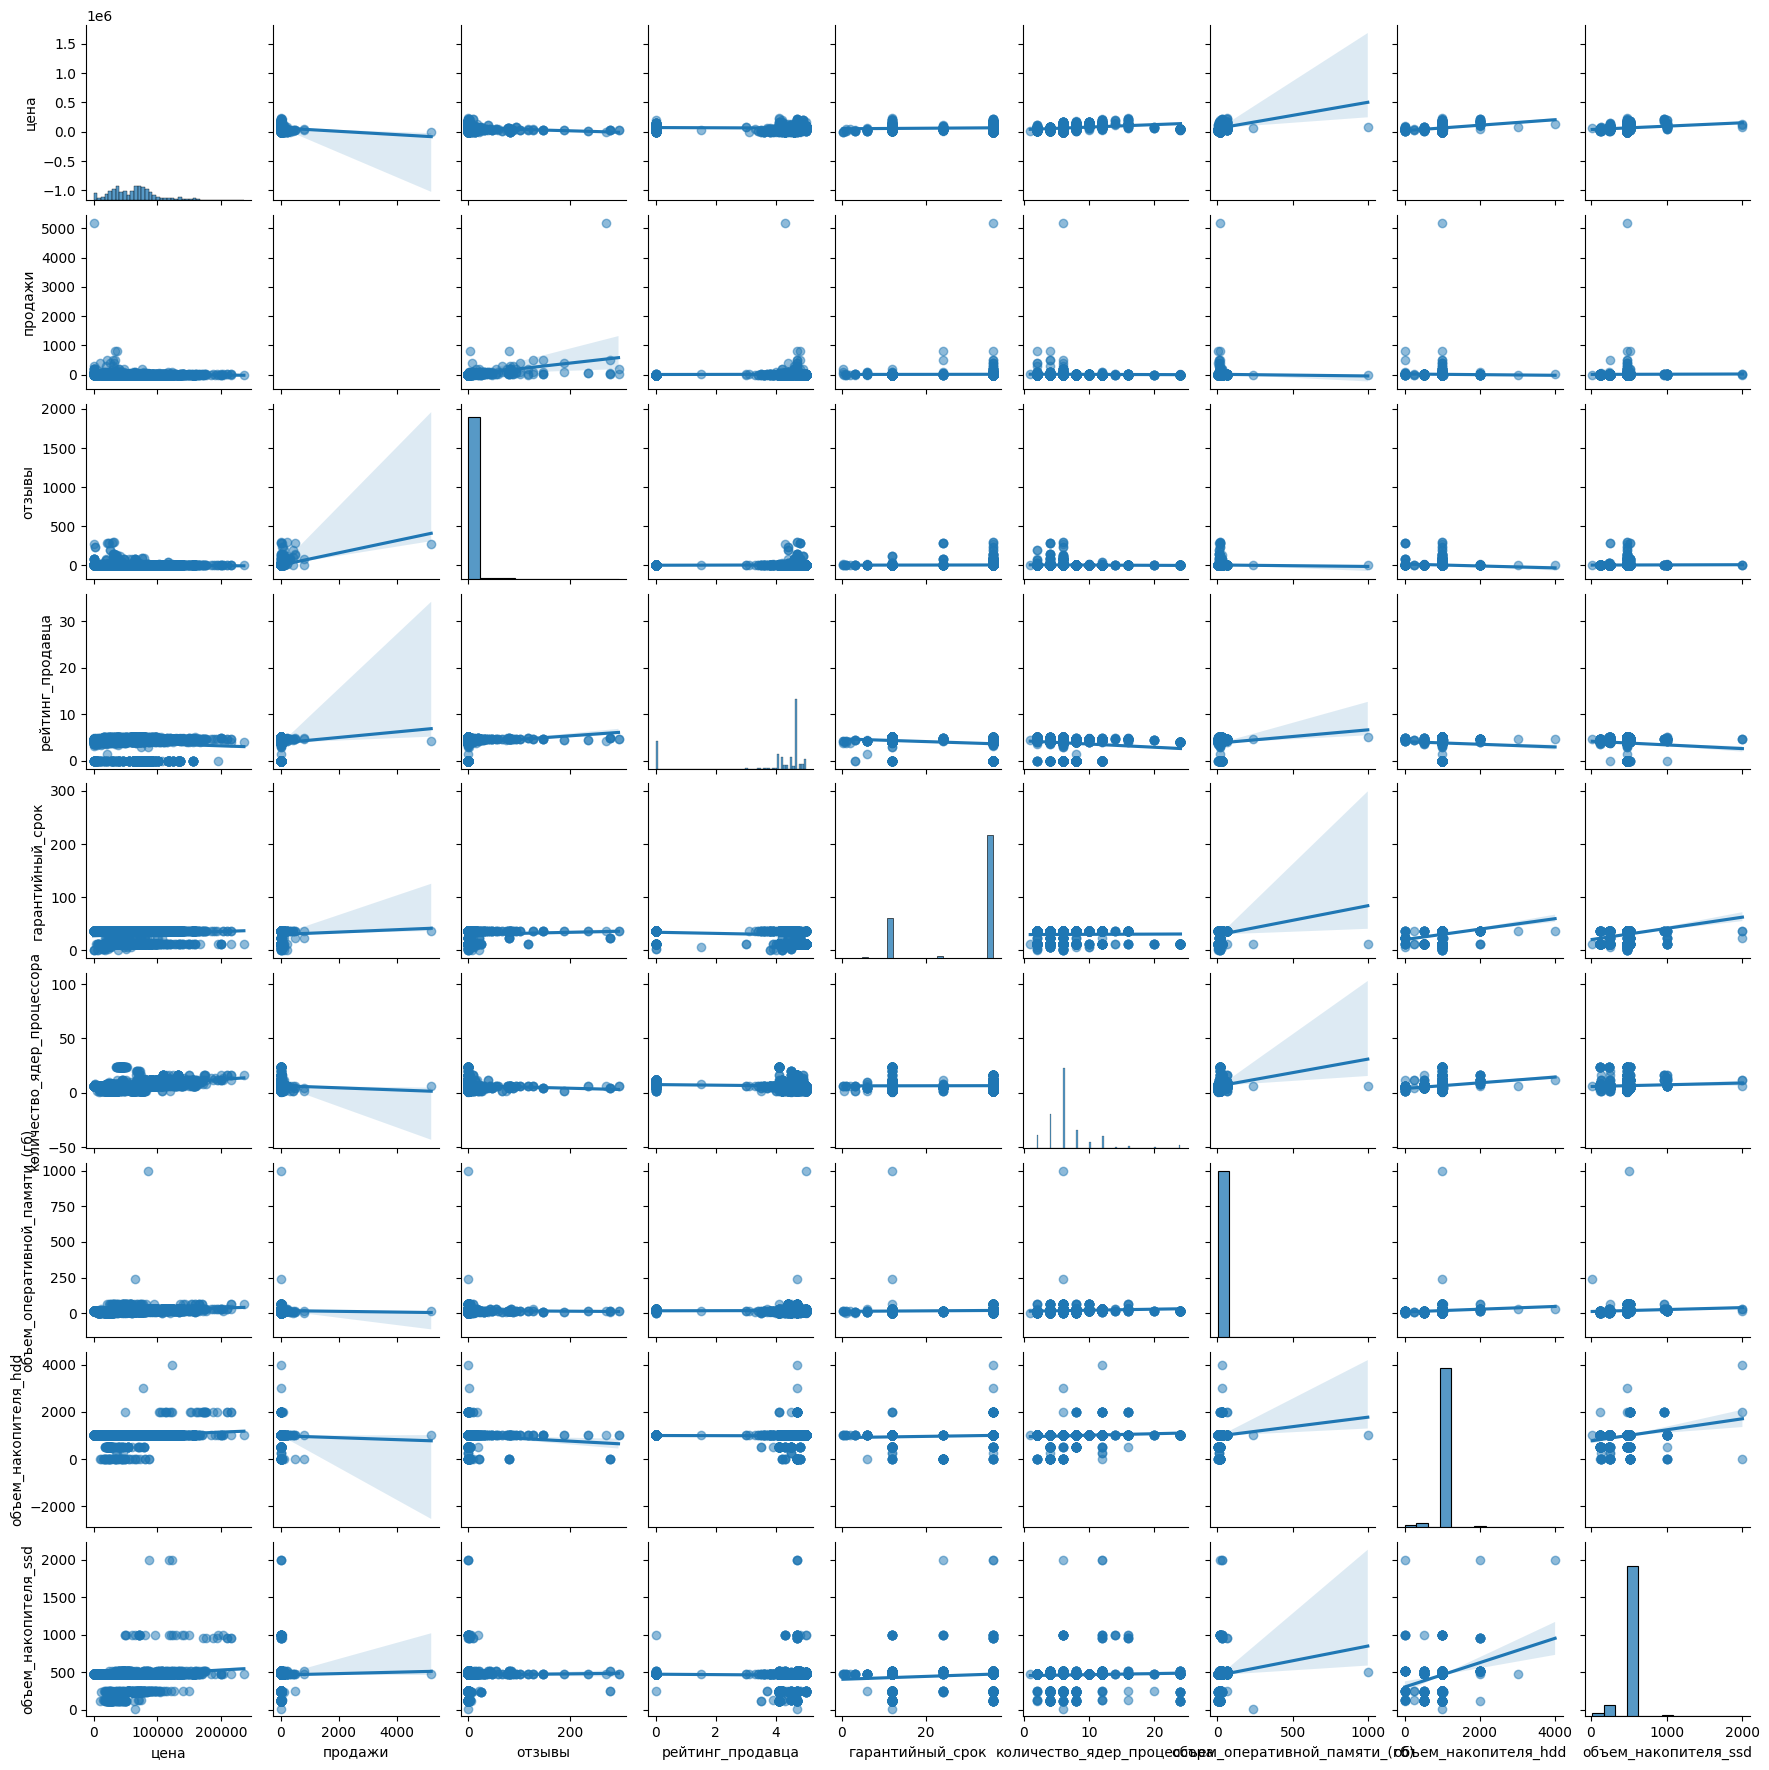

In [ ]:
# Определение количественных признаков (числовых столбцов)
quantitative_columns_filtered = data_copy[[
    'цена',
    'продажи',
    'отзывы',
    'рейтинг_продавца',
    'гарантийный_срок',
    'количество_ядер_процессора',
    'объем_оперативной_памяти_(гб)',
    'объем_накопителя_hdd',
    'объем_накопителя_ssd'
]].apply(pd.to_numeric, errors='coerce').dropna()

# Компактная визуализация с использованием PairGrid с диагональными гистограммами и графиками регрессии
sns.pairplot(
    quantitative_columns_filtered,
    diag_kind='hist',
    kind='reg',
    plot_kws={'scatter_kws': {'alpha': 0.5}},
    height=2
)

# Показать график
plt.show()

Распределение признаков:

На диагонали PairGrid представлены гистограммы, показывающие распределение каждого количественного признака:

Цена, продажи, и отзывы имеют положительно скошенные распределения (большинство значений сосредоточено в нижнем диапазоне, с длинным хвостом справа).
Рейтинг продавца имеет достаточно узкое распределение, показывающее, что большинство продавцов имеют схожие рейтинги.
Количество ядер процессора, объем оперативной памяти, и объем накопителей показывают несколько пиков, указывающих на популярные конфигурации оборудования.

Взаимосвязи между признаками:

Продажи и отзывы:

Сильная положительная корреляция, что логично, так как большее количество продаж часто приводит к большему количеству отзывов.

Гарантийный срок и цена:

Положительная корреляция. Продукты с более высокой ценой, как правило, имеют более длинные гарантии.

Количество ядер процессора и объем оперативной памяти:

Наблюдается положительная корреляция, указывающая на то, что компьютеры с более мощными процессорами также оснащаются большим объемом оперативной памяти.

Цена и количество ядер процессора:

Умеренная положительная корреляция, что ожидаемо, так как более мощные процессоры стоят дороже.

Цена и объем накопителя SSD:

 Слабая положительная корреляция, что может указывать на то, что SSD объем не является главным фактором, влияющим на цену.

Отсутствие значимой корреляции:

Между рейтингом продавца и другими количественными признаками нет значительной зависимости. Это может означать, что рейтинг продавца не сильно зависит от характеристик товара.

Линейные тренды и регрессии:

Линии регрессии на графиках показывают тенденции, большинство из которых подтверждают наличие линейных взаимосвязей. Это особенно заметно в парах "продажи-отзывы" и "цена-количество ядер процессора".

## 4.4 Взаимосвязь категориальных признаков

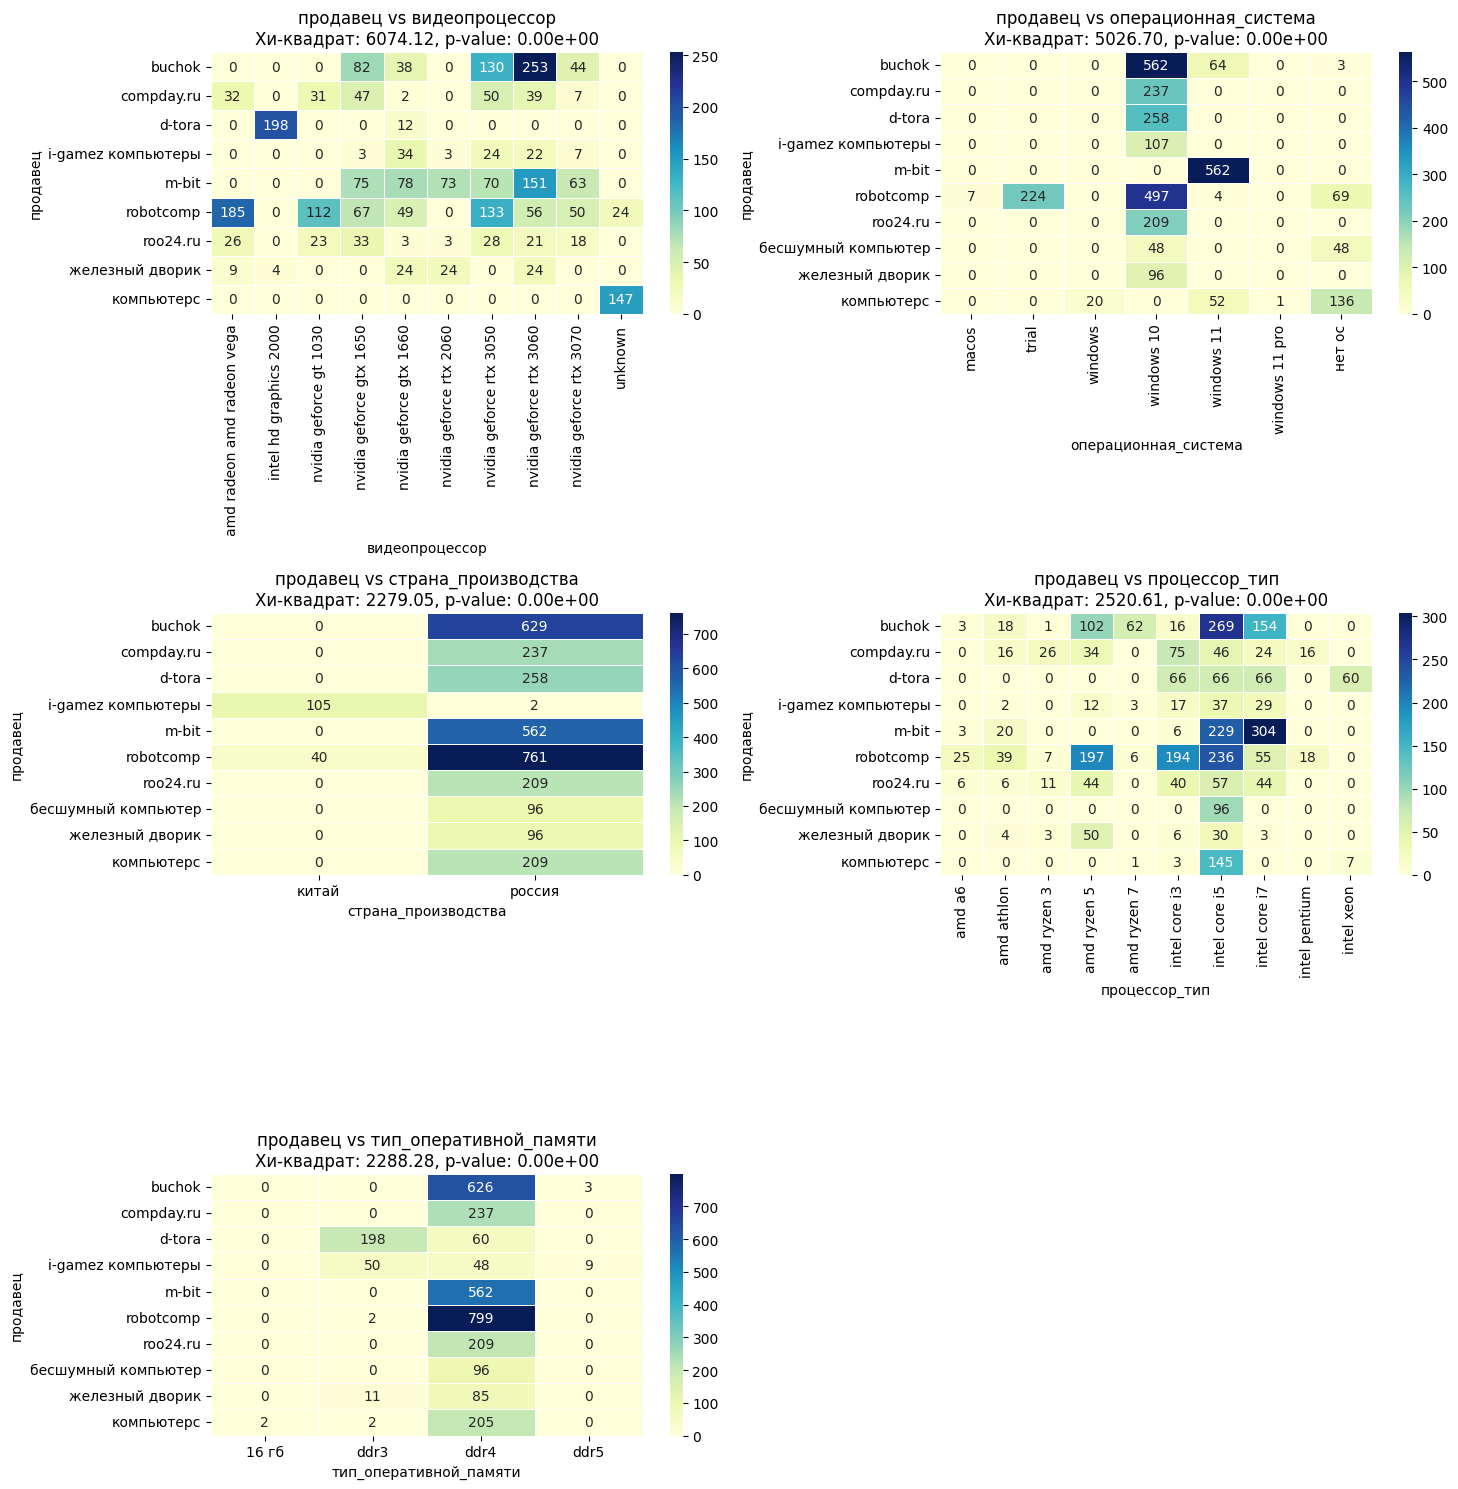

In [ ]:
# Определение значимых пар категориальных признаков для построения тепловых карт
significant_pairs_custom = [
    ('продавец', 'видеопроцессор'),
    ('продавец', 'операционная_система'),
    ('продавец', 'страна_производства'),
    ('продавец', 'процессор_тип'),
    ('продавец', 'тип_оперативной_памяти')
]

# Функция для визуализации заданных значимых тепловых карт с аннотацией чисел
def create_custom_heatmaps_with_annotations(data, significant_pairs):
    # Определяем размер полотна
    num_plots = len(significant_pairs)
    cols = 2  # Количество столбцов
    rows = (num_plots // cols) + (num_plots % cols > 0)

    # Создание фигуры и осей для субплотов
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
    axes = axes.flatten()  # Преобразование осей в одномерный массив для удобства работы

    # Построение тепловых карт для каждой значимой комбинации
    for idx, (col1, col2) in enumerate(significant_pairs):
        # Выбираем топ-10 значений по частоте для каждого признака
        top_values_col1 = data[col1].value_counts().nlargest(10).index
        top_values_col2 = data[col2].value_counts().nlargest(10).index

        # Фильтруем данные для топ-10 значений
        filtered_data = data[data[col1].isin(top_values_col1) & data[col2].isin(top_values_col2)]

        # Создание таблицы сопряженности
        contingency_table = pd.crosstab(filtered_data[col1], filtered_data[col2])

        # Проверка наличия данных в таблице сопряженности
        if contingency_table.empty:
            axes[idx].set_visible(False)  # Скрываем пустой субплот
            continue

        # Выполнение хи-квадрат теста
        chi2, p, dof, ex = chi2_contingency(contingency_table)

        # Визуализация таблицы сопряженности на соответствующем субплоте с аннотациями
        sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5, ax=axes[idx])
        axes[idx].set_title(f'{col1} vs {col2}\nХи-квадрат: {chi2:.2f}, p-value: {p:.2e}')
        axes[idx].set_xlabel(col2)
        axes[idx].set_ylabel(col1)

    # Удаляем пустые субплоты, если они есть
    for i in range(idx + 1, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Визуализация заданных значимых тепловых карт с аннотацией чисел
create_custom_heatmaps_with_annotations(data_copy, significant_pairs_custom)

Общий анализ по всем продавцам:

robotcom:

Фаворит на рынке по многим категориям. Этот продавец предлагает широкий ассортимент видеокарт, включая NVIDIA GeForce RTX 3060 и GTX 1660, что делает его лидером в сегменте высокопроизводительных графических решений.
Активно продает товары с предустановленной Windows 10, а также предоставляет возможность покупки товаров без операционной системы, что дает клиентам гибкость в выборе.
Большинство товаров у robotcom произведены в России, что может указывать на предпочтение локальных производителей или сборщиков.
Широкий ассортимент процессоров (особенно Intel Core i5 и i7) и типов оперативной памяти (DDR4) делает robotcom привлекательным для пользователей с разными потребностями — от геймеров до профессионалов.

m-bit:

Сосредоточен на продаже компьютеров с Windows 10, а также часто предлагает модели с нет ОС, что указывает на гибкость в удовлетворении потребностей клиентов, которые хотят самостоятельно установить операционную систему.
Ассортимент видеокарт у m-bit менее разнообразен по сравнению с robotcom, но включает в себя популярные модели, такие как NVIDIA GeForce GTX 1650.
Присутствие Intel Core i5 и i7 также характерно для этого продавца, что говорит о его фокусе на среднем и высоком сегментах производительности.

buchok:

Основное внимание уделяется товарам с предустановленной Windows 10 и некоторыми предложениями без ОС.
buchok фокусируется на продаже процессоров Intel и AMD, что показывает стремление предложить разнообразие в выборке процессоров.
Ассортимент оперативной памяти в основном состоит из DDR4, что является стандартом на рынке.

d-tora:

Продавец предлагает широкий выбор видеокарт и имеет хорошее присутствие в сегменте оперативной памяти с типами DDR3, DDR4, и даже DDR5, что делает его уникальным на рынке.
В ассортименте d-tora присутствуют модели с разными операционными системами и без них, что делает его универсальным продавцом для различных категорий покупателей.

compday.ru:

compday.ru фокусируется на продаже товаров с процессорами Intel и AMD, предлагая модели как бюджетного, так и среднего уровня.
Продавец предлагает товары с разными типами оперативной памяти, включая DDR4, что является стандартом, но также включает DDR3, удовлетворяя потребности клиентов с ограниченным бюджетом.

Общие выводы:

Ассортимент и специализация: Продавцы, такие как robotcom, выделяются за счет широкой линейки продуктов и ориентации на популярные видеокарты и процессоры. Это делает их универсальными игроками на рынке.

Гибкость в предложении ОС:

Большинство продавцов предлагают как модели с предустановленной ОС, так и без нее, что увеличивает гибкость в удовлетворении потребностей клиентов.

Преимущество локального производства:

Большинство продавцов, особенно robotcom, ориентированы на товары, произведенные в России, что может быть результатом логистических преимуществ или более низких затрат на поставку.

Диверсификация компонентов:

Разные продавцы предлагают различные типы оперативной памяти и процессоров, чтобы охватить как бюджетный, так и премиум-сегменты.

# **5 Общие выводы по анализу данных и рекомендации**

В ходе анализа данных о рынке персональных компьютеров, представленных в онлайн-магазине, были выявлены ключевые факторы, влияющие на цену и популярность компьютеров. Данные охватывают широкий спектр характеристик, включая технические параметры, рейтинги продавцов, количество отзывов и продаж, а также гарантийные сроки и страну производства.

**1.1 Основные наблюдения**

Разнообразие ассортимента:

* Датасет содержит более 2000 уникальных наименований компьютеров и комплектующих, что говорит о высоком разнообразии ассортимента.
* Основные продавцы сосредоточены на продаже игровых компьютеров и мощных рабочих станций с высокопроизводительными компонентами.

Распределение цен:

* Большинство компьютеров находится в диапазоне цен от 35,000 до 81,000 рублей.
* Есть товары с экстремально высокими ценами (до 235,900 рублей), связанные с премиум-классом оборудования.

Популярность и продажи:

* Продажи сосредоточены в нижнем диапазоне: большинство товаров имеет мало продаж (0-5), но есть несколько популярных моделей с продажами до 5200 единиц.
* Количество отзывов коррелирует с количеством продаж; популярные товары получают больше отзывов.

Рейтинг продавцов:

* Большинство продавцов имеют высокие рейтинги (4.1 и выше), но продавцы с низким рейтингом (ниже 4.0) имеют нулевые продажи и отзывы.

Технические характеристики и их влияние:

* Процессоры: Основной акцент на процессоры Intel Core (i5, i7), а также AMD Ryzen (5, 7). Компьютеры с процессорами i5 и i7, как правило, имеют более высокую цену и большие продажи.
* Оперативная память: В основном используется DDR4, а объем оперативной памяти 16 ГБ является стандартом для большинства компьютеров.
* Графические процессоры: Наиболее популярные графические карты — NVIDIA GeForce RTX 3060 и GTX 1660. Они востребованы среди покупателей и влияют на цену компьютеров.

Гарантийный срок:

* Большинство товаров имеют гарантийный срок 36 месяцев. Более короткие сроки гарантии (менее 12 месяцев) могут негативно влиять на популярность и продажи товаров.

Происхождение продукции:

* Большинство товаров производится в России и Китае, что может влиять на восприятие их качества и надежности среди покупателей.

**1.2 Влияние характеристик на цену и продажи**

Цена и объем продаж:

* Компьютеры среднего ценового сегмента (35,000-81,000 рублей) продаются лучше, чем премиальные модели.
* Мощные игровые компьютеры и рабочие станции с высокопроизводительными компонентами (многоядерные процессоры, большие объемы оперативной памяти и SSD) имеют высокие цены, но ограниченные продажи.

Популярность товаров:

* Модели с предустановленными операционными системами (например, Windows 10, Windows 11) более популярны.
* Товары с известными и востребованными графическими процессорами (например, NVIDIA RTX 3060) чаще покупают.

Рейтинг продавцов и доверие покупателей:

* Низкий рейтинг продавца (ниже 4.0) практически гарантирует отсутствие продаж и отзывов, независимо от характеристик товара.
* Продавцы с высоким рейтингом (4.7 и выше), такие как robotcomp, демонстрируют более высокие продажи и положительные отзывы.

# **2. Рекомендации для Заказчика**

**2.1 Ассортимент и ценообразование**

Фокус на средний ценовой сегмент:

* Рекомендуется сосредоточиться на компьютерах в ценовом диапазоне от 35,000 до 81,000 рублей. Этот сегмент является наиболее популярным и генерирует наибольшее количество продаж.

Комплектация компьютеров:

* Собирайте компьютеры с процессорами Intel Core i5 и i7 или AMD Ryzen 5 и 7, так как они пользуются наибольшим спросом.
* Используйте графические процессоры NVIDIA GeForce RTX 3060 и GTX 1660, которые популярны среди покупателей.
* Оперативная память DDR4 объемом 16 ГБ является стандартом, но для игровых ПК можно предлагать варианты с 32 ГБ.

Операционные системы:

* Предлагайте компьютеры как с предустановленной операционной системой (Windows 10 или Windows 11), так и без нее, чтобы увеличить гибкость предложения.

**2.2 Работа с репутацией и рейтингами**

Поддержание высокого рейтинга продавца:

* Рекомендуется внимательно следить за отзывами и работать над улучшением сервиса, чтобы поддерживать высокий рейтинг. Это непосредственно влияет на доверие покупателей и их решение о покупке.

Активное управление отзывами:

* Важно стимулировать покупателей оставлять отзывы, особенно на популярные модели. Большее количество отзывов положительно влияет на популярность товара.

**2.3 Гарантийные обязательства**

Предоставление стандартного гарантийного срока:

* Поддерживайте гарантийный срок не менее 36 месяцев для всех товаров, особенно для моделей с высокой ценой и продвинутыми техническими характеристиками.

**2.4 Логистика и происхождение продукции**

Фокус на локальное производство:

* Рассмотрите возможность размещения сборки продукции в России, чтобы воспользоваться преимуществами логистики и сокращения затрат.

**2.5 Диверсификация и уникальные предложения**

Диверсификация ассортимента:

* Учитывайте разнообразие потребностей клиентов и предлагайте различные типы комплектующих и конфигураций для охвата как бюджетного, так и премиум-сегмента.

Создание уникальных предложений:

* Рассмотрите возможность создания уникальных сборок и пакетов с учетом популярных требований рынка, таких как игровые ПК с возможностью расширения или рабочие станции для профессионалов.

Заключение

Данный аналитический отчет предоставляет заказчику ключевые выводы и рекомендации для успешного выхода на онлайн-рынок персональных компьютеров. Следуя этим рекомендациям, компания сможет оптимизировать свой ассортимент, улучшить ценообразование и повысить доверие клиентов, что в конечном итоге приведет к увеличению продаж и прибыльности.

Привет, спасибо за ревью моей работы, жду перечень замечаний и рекомендаций, для успешной сдачи стажировки